# Import Packages

In [1]:
library(dplyr)
library(tidyr)
library(IDPmisc)
library(ggplot2)
library(repr) # options() to change size of plot image
library(gridExtra) # sid-by-side plots


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Import Data

* The data was retrieved from the (BioLINCC)[https://biolincc.nhlbi.nih.gov/teaching/]
* Data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts which was collected during three examination periods, approximately 6 years apart, from roughly 1956 to 1968
* Missing values in the dataset are indicated by a period (.)
* Disclaimer: This is teaching data that has been rendered anonymous through the application of certain statistical processes such as permutations and/or random visit selection. We cannot claim or imply that any inferences derived from the teaching datasets are valid estimates

## Data Dictionary

|Variable|Description|Levels (if applicable)/<br> Notes|
| --- | --- |---|
|RANDID | Unique identification number for each participant||
|SEX | Participant sex |1=Men <br> 2=Women|
|PERIOD|Examination Cycle|1=Period 1 <br> 2=Period 2 <br> 3=Period 3|
|TIME| Number of days since baseline exam||
|AGE|AGE at exam (years)||
|SYSBP|Systolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|DIABP|Diastolic Blood Pressure (mean of last two of three <br> measurements) (mmHg)|
|BPMEDS|Use of Anti-hypertensive medication at exam|0=Not currently used <br> 1=Current Use|
|CURSMOKE|Current cigarette smoking at exam|0=Not current smoker <br> 1=Current smoker|
|CIGPDAY|Number of cigarettes smoked each day|0=Not current smoker <br> 1-90 cigarettes per day|
|TOTCHOL|Serum Total Cholesterol (mg/dL)||
|HDLC|High Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|LDLC|Low Density Lipoprotein Cholesterol (mg/dL)|available for period 3 only|
|BMI|Body Mass Index, weight in kilograms/height <br> meters squared||
|GLUCOSE|Casual serum GLUCOSE (mg/dL)||
|DIABETES|Diabetic according to criteria of first exam <br> treated or first exam with casual GLUCOSE <br> of 200 mg/dL or more|0=Not a diabetic <br> 1=Diabetic|
|HEARTRTE|Heart rate (Ventricular rate) in beats/min|
|PREVHYP|Prevalent Hypertensive. Subject was defined as <br> hypertensive if treated or if second exam at <br>which mean systolic was >=140 mmHg or mean<br>  Diastolic >=90 mmHg|0=Free of disease <br> 1=Prevalent disease|
|ANYCHD|Angina Pectoris, <br> Myocardial infarction (Hospitalized and silent or unrecognized), <br>Coronary Insufficiency (Unstable Angina), <br> or Fatal Coronary Heart Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|STROKE|Atherothrombotic infarction, <br>Cerebral Embolism, <br>Intracerebral HemorrhAGE, <br> or Subarachnoid HemorrhAGE, <br> or Fatal Cerebrovascular Disease|0=Event did not occur during follow up <br> 1=Event occurred during followup|
|DEATH|Death from any cause|0=Event did not occur during follow up <br> 1=Event occurred during followup|

In [2]:
framingham = read.csv('/Users/silviacatalina/Google Drive/BethelTech/GitHub/wozU-DataSci/DS0110-FinalProject/Framingham/Data/csv/frmgham2.csv', na.strings = ".")
head(framingham)

RANDID SEX TOTCHOL AGE SYSBP DIABP CURSMOKE CIGPDAY BMI   DIABETES ⋯ CVD
1 2448   1   195     39  106.0 70.0  0         0      26.97 0        ⋯ 1  
2 2448   1   209     52  121.0 66.0  0         0         NA 0        ⋯ 1  
3 6238   2   250     46  121.0 81.0  0         0      28.73 0        ⋯ 0  
4 6238   2   260     52  105.0 69.5  0         0      29.43 0        ⋯ 0  
5 6238   2   237     58  108.0 66.0  0         0      28.50 0        ⋯ 0  
6 9428   1   245     48  127.5 80.0  1        20      25.34 0        ⋯ 0  
  HYPERTEN TIMEAP TIMEMI TIMEMIFC TIMECHD TIMESTRK TIMECVD TIMEDTH TIMEHYP
1 0        8766   6438   6438     6438    8766     6438    8766    8766   
2 0        8766   6438   6438     6438    8766     6438    8766    8766   
3 0        8766   8766   8766     8766    8766     8766    8766    8766   
4 0        8766   8766   8766     8766    8766     8766    8766    8766   
5 0        8766   8766   8766     8766    8766     8766    8766    8766   
6 0        8766   8766   8766     8766    8766     8766    8766    8766

In [3]:
str(framingham)

'data.frame':	11627 obs. of  39 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ educ    : int  4 4 2 2 2 1 1 3 3 3 ...
 $ PREVCHD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVAP  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVMI  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVSTRK: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ TIME    : int  0 4628 0 2156 4344 0 2199 0 1977 0 ...

# Data Wrangling

## Select Columns of interest

In [4]:
keep=c('RANDID', 'SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 
       'BMI', 'GLUCOSE', 'DIABETES', 'HEARTRTE', 'PREVHYP', 'ANYCHD', 'STROKE', 'DEATH')
framingham1 = framingham[keep]
str(framingham1)

'data.frame':	11627 obs. of  18 variables:
 $ RANDID  : int  2448 2448 6238 6238 6238 9428 9428 10552 10552 11252 ...
 $ SEX     : int  1 1 2 2 2 1 1 2 2 2 ...
 $ PERIOD  : int  1 3 1 2 3 1 2 1 2 1 ...
 $ AGE     : int  39 52 46 52 58 48 54 61 67 46 ...
 $ SYSBP   : num  106 121 121 105 108 ...
 $ DIABP   : num  70 66 81 69.5 66 80 89 95 109 84 ...
 $ BPMEDS  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CURSMOKE: int  0 0 0 0 0 1 1 1 1 1 ...
 $ CIGPDAY : int  0 0 0 0 0 20 30 30 20 23 ...
 $ TOTCHOL : int  195 209 250 260 237 245 283 225 232 285 ...
 $ BMI     : num  27 NA 28.7 29.4 28.5 ...
 $ GLUCOSE : int  77 92 76 86 71 70 87 103 89 85 ...
 $ DIABETES: int  0 0 0 0 0 0 0 0 0 0 ...
 $ HEARTRTE: int  80 69 95 80 80 75 75 65 60 85 ...
 $ PREVHYP : int  0 0 0 0 0 0 0 1 1 0 ...
 $ ANYCHD  : int  1 1 0 0 0 0 0 0 0 0 ...
 $ STROKE  : int  0 0 0 0 0 0 0 1 1 0 ...
 $ DEATH   : int  0 0 0 0 0 0 0 1 1 0 ...


## Split Dataset into Periods 1, 2, 3; Remove NAs

In [5]:
framinghamP1 = framingham1 %>% filter(PERIOD == 1)
framinghamP1 = subset(framinghamP1, select  = - PERIOD)
framinghamP1 = NaRV.omit(framinghamP1)
head(framinghamP1)

RANDID SEX AGE SYSBP DIABP BPMEDS CURSMOKE CIGPDAY TOTCHOL BMI   GLUCOSE
1  2448  1   39  106.0  70   0      0         0      195     26.97  77    
2  6238  2   46  121.0  81   0      0         0      250     28.73  76    
3  9428  1   48  127.5  80   0      1        20      245     25.34  70    
4 10552  2   61  150.0  95   0      1        30      225     28.58 103    
5 11252  2   46  130.0  84   0      1        23      285     23.10  85    
6 11263  2   43  180.0 110   0      0         0      228     30.30  99    
  DIABETES HEARTRTE PREVHYP ANYCHD STROKE DEATH
1 0        80       0       1      0      0    
2 0        95       0       0      0      0    
3 0        75       0       0      0      0    
4 0        65       1       0      1      1    
5 0        85       0       0      0      0    
6 0        77       1       1      0      0

In [6]:
framinghamP2 = framingham1 %>% filter(PERIOD == 2)
framinghamP2 = subset(framinghamP2, select  = - PERIOD)
framinghamP2 = NaRV.omit(framinghamP2)
head(framinghamP2)

RANDID SEX AGE SYSBP DIABP BPMEDS CURSMOKE CIGPDAY TOTCHOL BMI   GLUCOSE
1  6238  2   52  105    69.5 0      0         0      260     29.43 86     
2  9428  1   54  141    89.0 0      1        30      283     25.34 87     
3 10552  2   67  183   109.0 0      1        20      232     30.18 89     
4 11252  2   51  109    77.0 0      1        30      343     23.48 72     
5 11263  2   49  177   102.0 1      0         0      230     31.36 86     
6 12629  2   70  149    81.0 0      0         0      220     36.76 98     
  DIABETES HEARTRTE PREVHYP ANYCHD STROKE DEATH
1 0         80      0       0      0      0    
2 0         75      0       0      0      0    
3 0         60      1       0      1      1    
4 0         90      0       0      0      0    
5 0        120      1       1      0      0    
6 0         80      1       1      0      0

In [7]:
framinghamP3 = framingham1 %>% filter(PERIOD == 3)
framinghamP3 = subset(framinghamP3, select  = - PERIOD)
framinghamP3 = NaRV.omit(framinghamP3)
head(framinghamP3)

RANDID SEX AGE SYSBP DIABP BPMEDS CURSMOKE CIGPDAY TOTCHOL BMI   GLUCOSE
2  6238  2   58  108    66   0      0         0      237     28.50  71    
4 11263  2   55  180   106   1      0         0      220     31.17  81    
5 12806  2   57  110    46   0      1        30      320     22.02  87    
6 14367  1   64  168   100   0      0         0      280     25.72  82    
7 16365  1   55  173   123   1      0         0      211     29.11  85    
9 23727  2   53  124    78   0      0         0      159     26.62 135    
  DIABETES HEARTRTE PREVHYP ANYCHD STROKE DEATH
2 0        80       0       0      0      0    
4 1        86       1       1      0      0    
5 0        75       0       0      0      0    
6 0        92       1       0      0      0    
7 0        75       1       0      0      0    
9 0        68       1       0      0      1

# Data Exploration
***

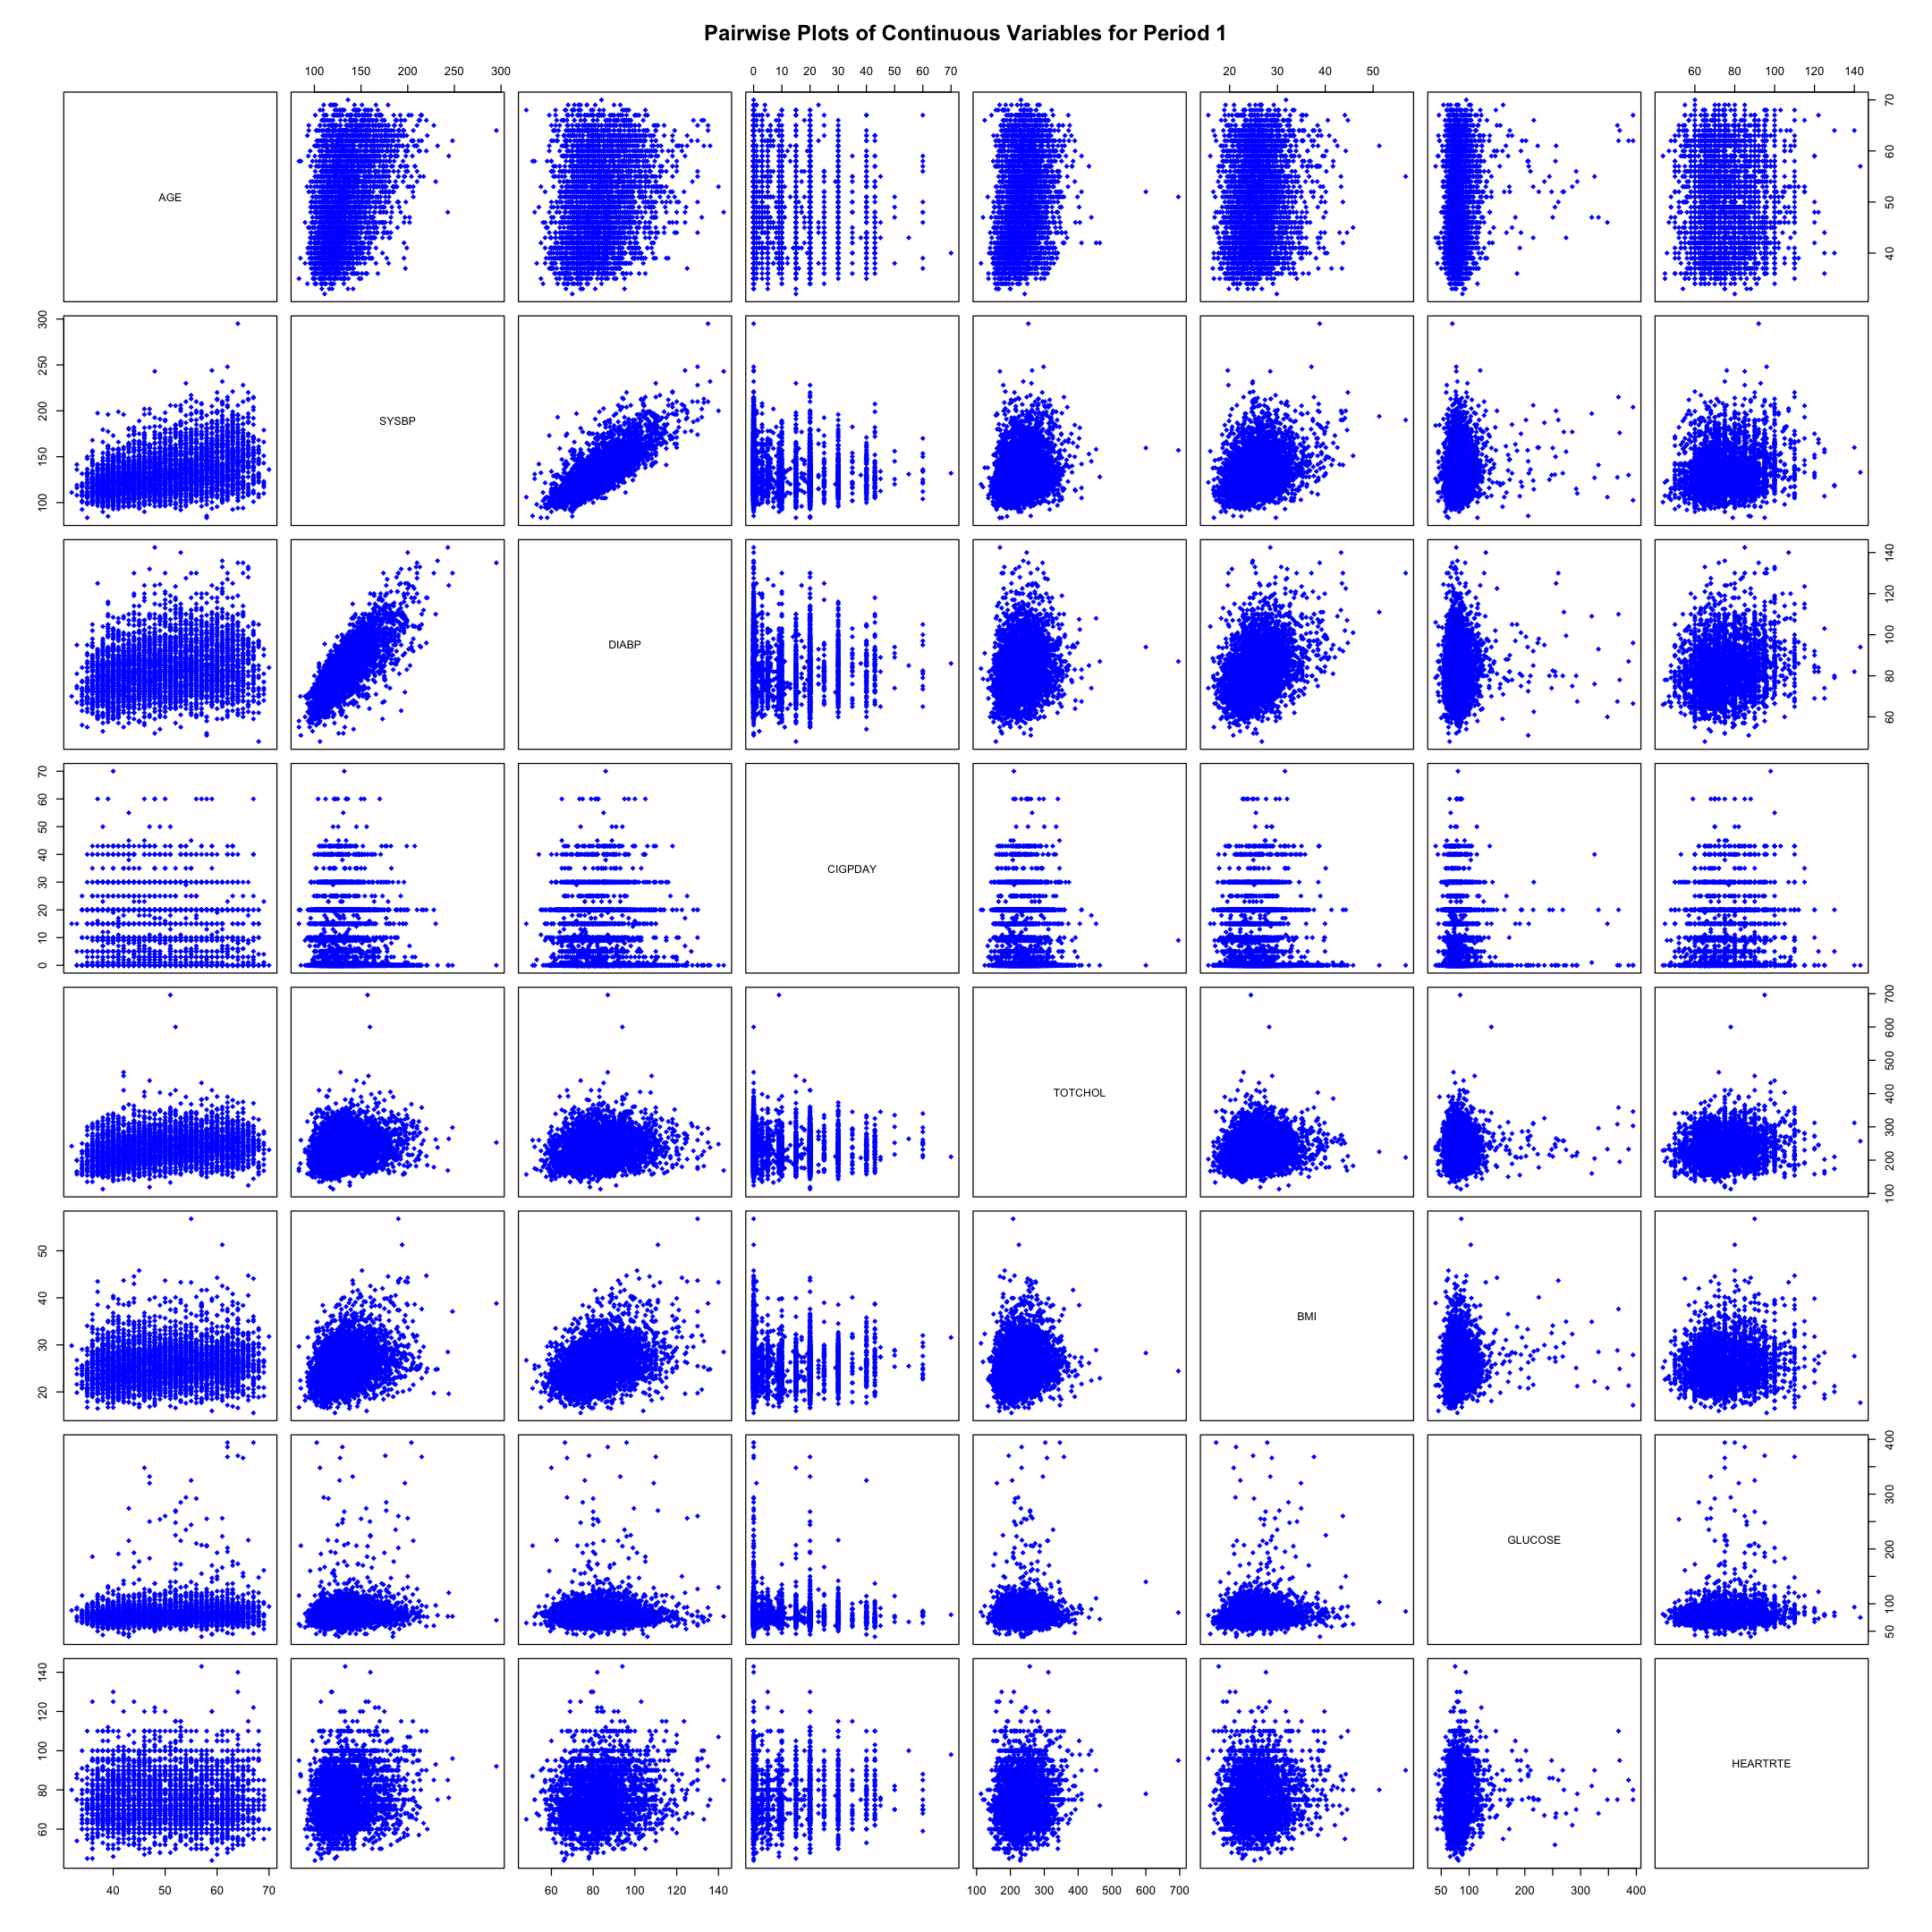

In [8]:
options(repr.plot.width=18, repr.plot.height=18)
pairs(~ AGE + SYSBP + DIABP + CIGPDAY + TOTCHOL + BMI + GLUCOSE + HEARTRTE, 
      col = "blue",                                         # Change color
      pch = 18,  
      data = framinghamP1,
      main = 'Pairwise Plots of Continuous Variables for Period 1')

In [9]:
cor.test(framinghamP1$SYSBP, framinghamP1$DIABP, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  framinghamP1$SYSBP and framinghamP1$DIABP
t = 79.317, df = 3925, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7724125 0.7964609
sample estimates:
      cor 
0.7847318 


__*Note that SYSBP and DIABP are strongly correlated in Period 1.*__

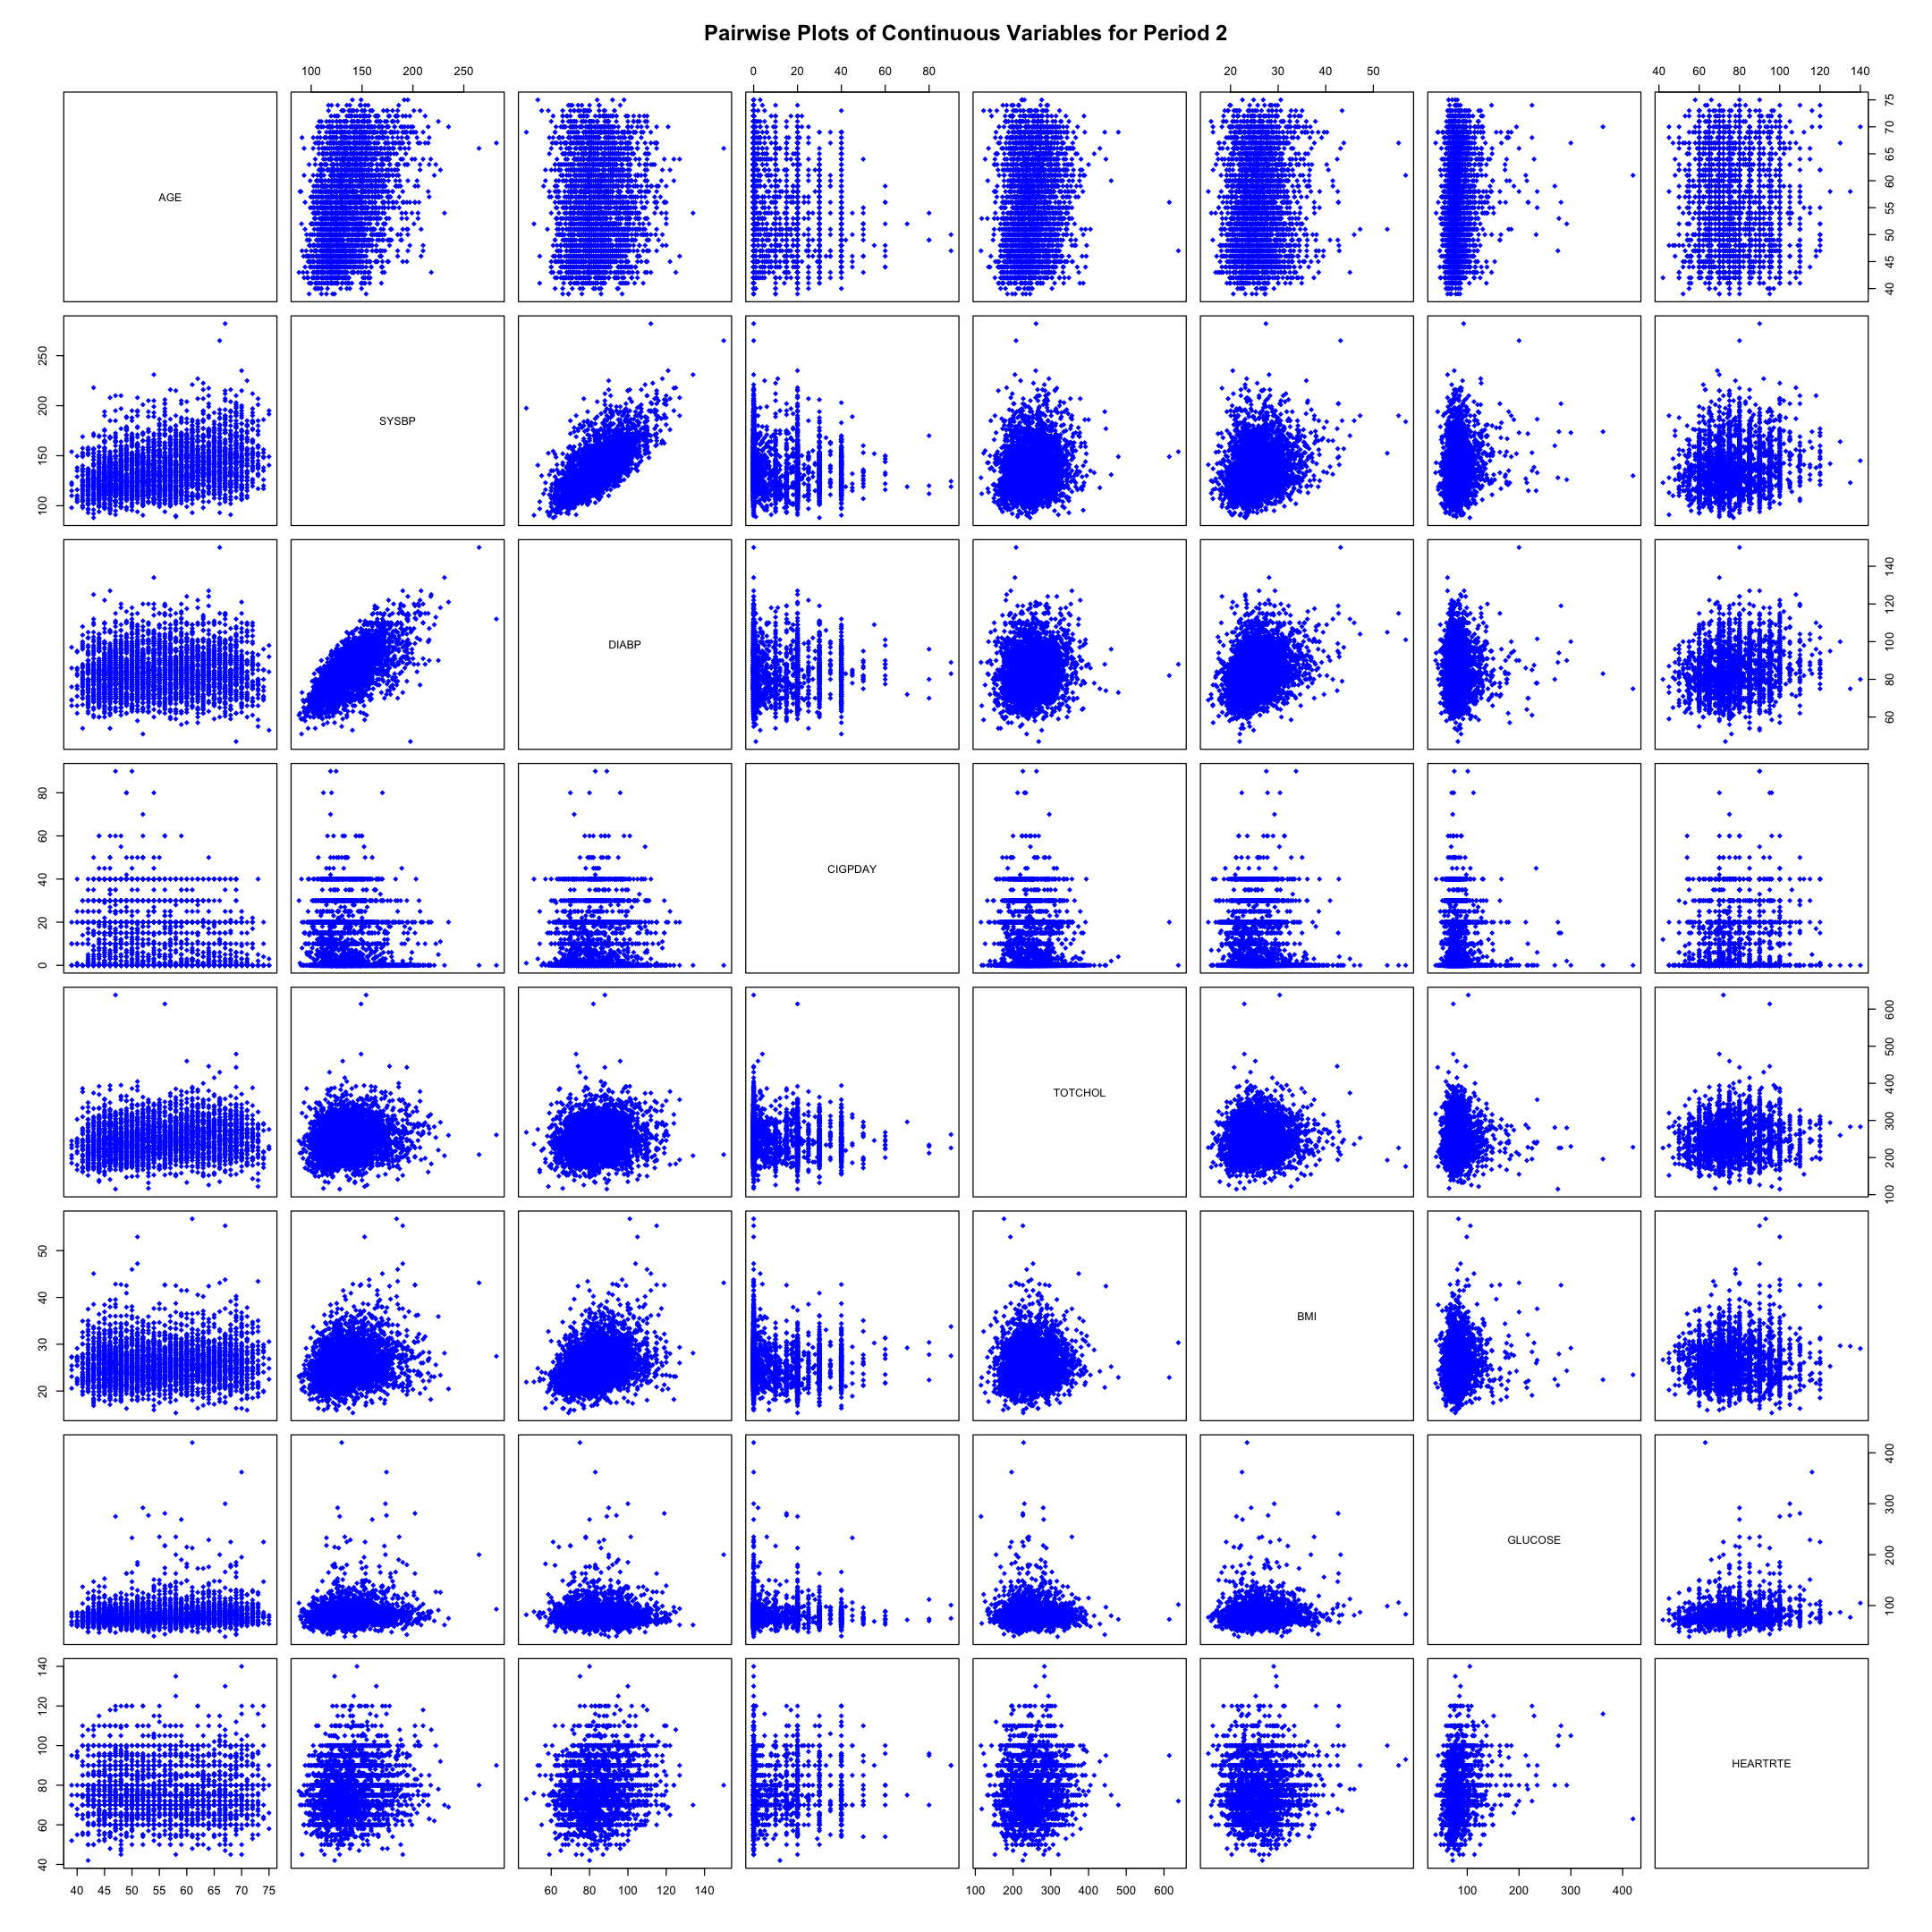

In [10]:
options(repr.plot.width=18, repr.plot.height=18)
pairs(~ AGE + SYSBP + DIABP + CIGPDAY + TOTCHOL + BMI + GLUCOSE + HEARTRTE, 
      col = "blue",                                         # Change color
      pch = 18,  
      data = framinghamP2,
      main = 'Pairwise Plots of Continuous Variables for Period 2')

In [11]:
cor.test(framinghamP2$SYSBP, framinghamP2$DIABP, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  framinghamP2$SYSBP and framinghamP2$DIABP
t = 58.192, df = 3307, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6940328 0.7277230
sample estimates:
      cor 
0.7112862 


__*Note that SYSBP and DIABP are strongly correlated in Period 2.*__

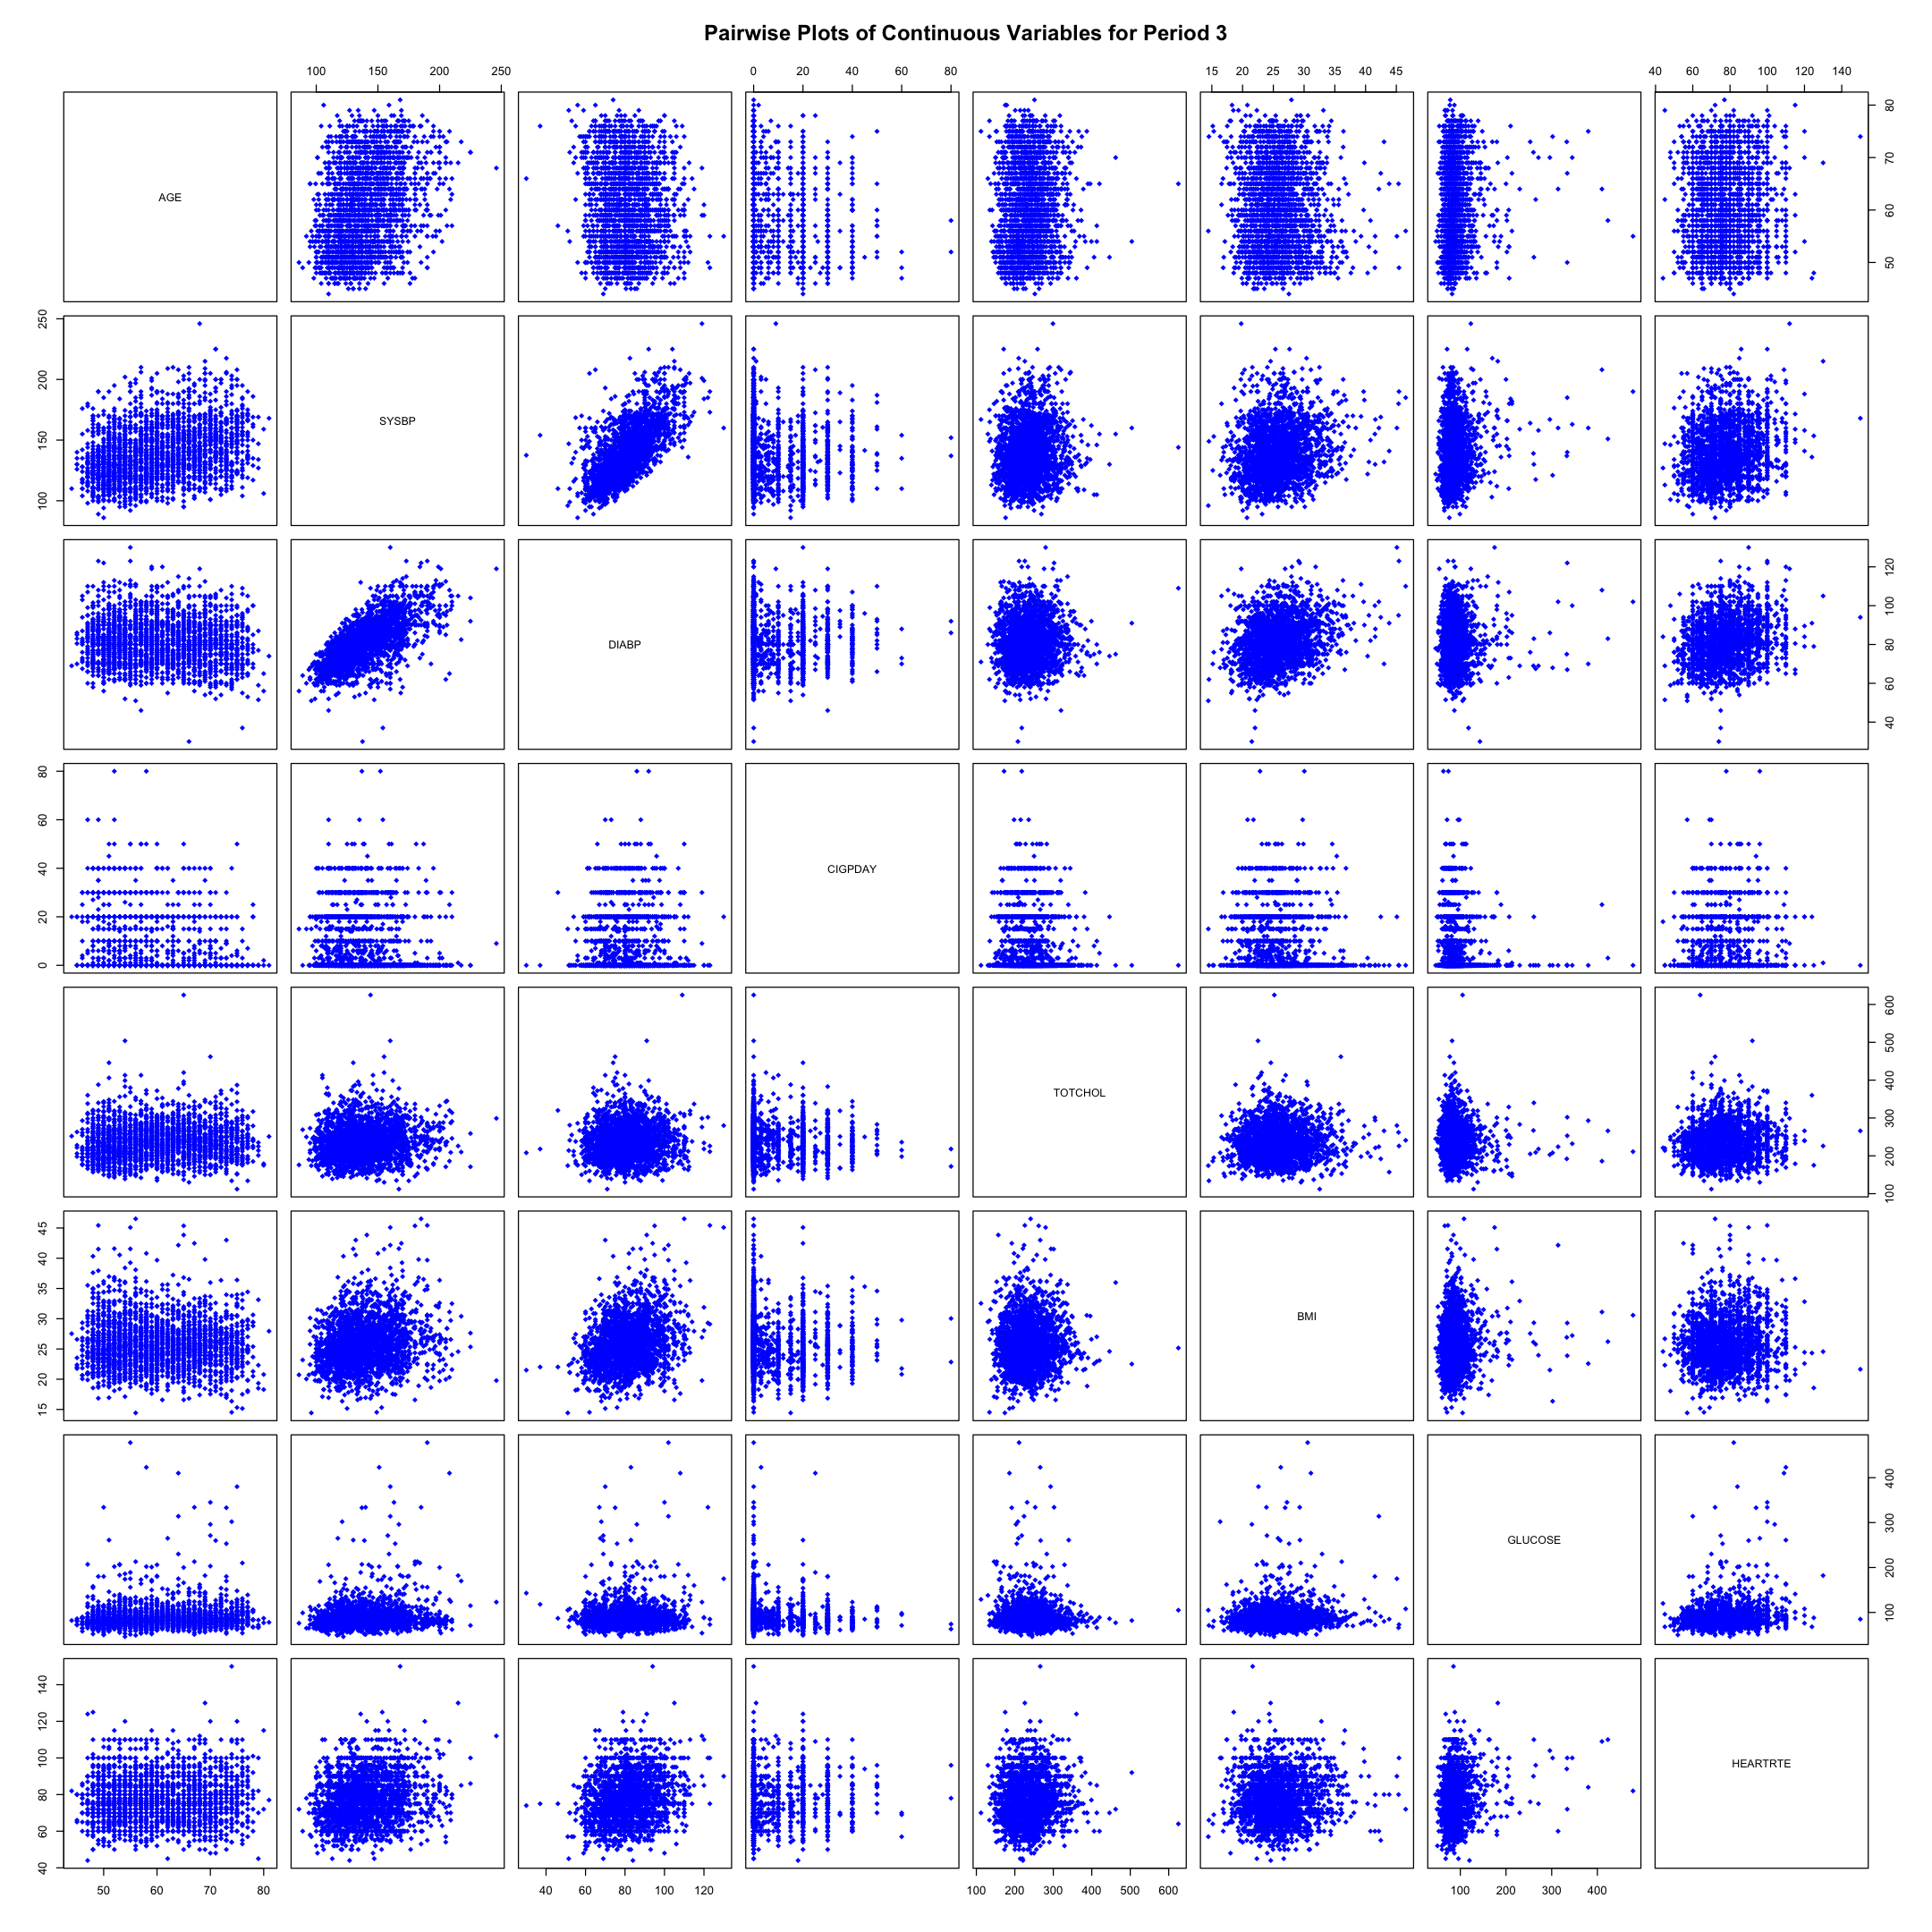

In [12]:
options(repr.plot.width=18, repr.plot.height=18)
pairs(~ AGE + SYSBP + DIABP + CIGPDAY + TOTCHOL + BMI + GLUCOSE + HEARTRTE, 
      col = "blue",                                         # Change color
      pch = 18,  
      data = framinghamP3,
      main = 'Pairwise Plots of Continuous Variables for Period 3')

In [13]:
cor.test(framinghamP3$SYSBP, framinghamP3$DIABP, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  framinghamP3$SYSBP and framinghamP3$DIABP
t = 43.048, df = 2322, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6429731 0.6882333
sample estimates:
      cor 
0.6662162 


__*Note that SYSBP and DIABP are moderately correlated in Period 3.*__

## AGE

### 1. Histograms

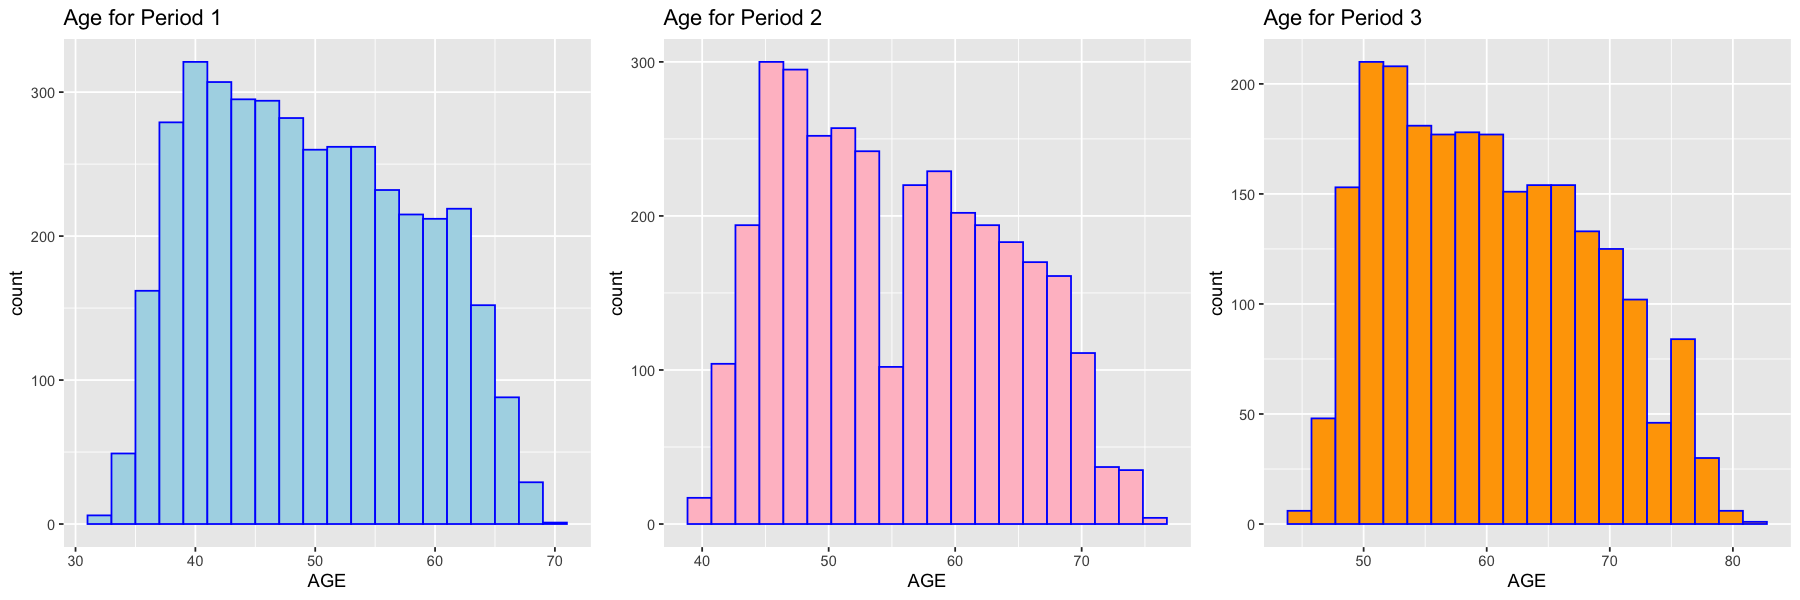

In [14]:
options(repr.plot.width=15, repr.plot.height=5)
a = ggplot(data = framinghamP1, aes(x = AGE)) + geom_histogram(bins = 20, fill='lightblue', color = "blue") + ggtitle('Age for Period 1')
b = ggplot(data = framinghamP2, aes(x = AGE)) + geom_histogram(bins = 20, fill='pink', color = "blue") + ggtitle('Age for Period 2')
c = ggplot(data = framinghamP3, aes(x = AGE)) + geom_histogram(bins = 20, fill='orange', color = "blue") + ggtitle('Age for Period 3')
grid.arrange(a, b, c, ncol = 3)

***Age range has increased over time, as the same subjects participating in the study got older.***

### 2. Age Distribution by Coronary Heart Disease (CHD) events

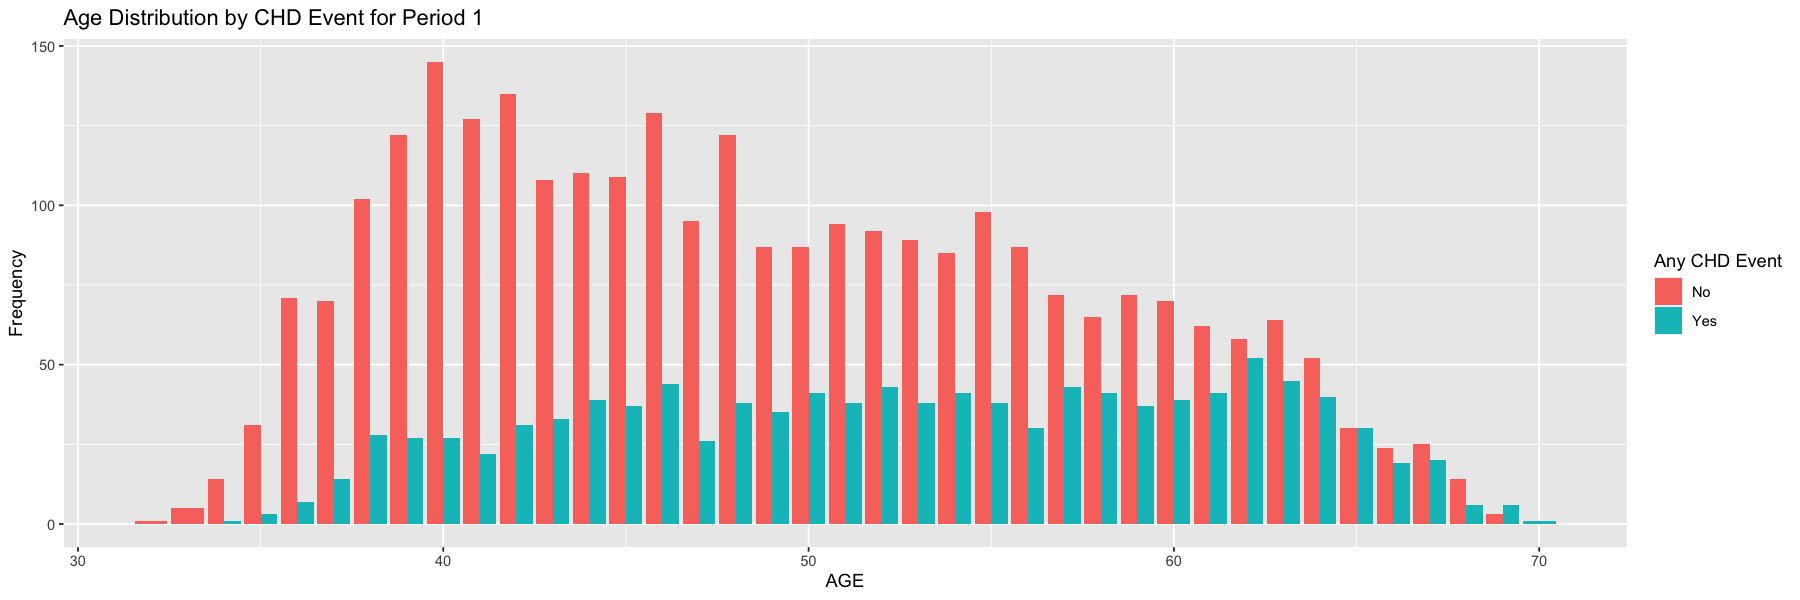

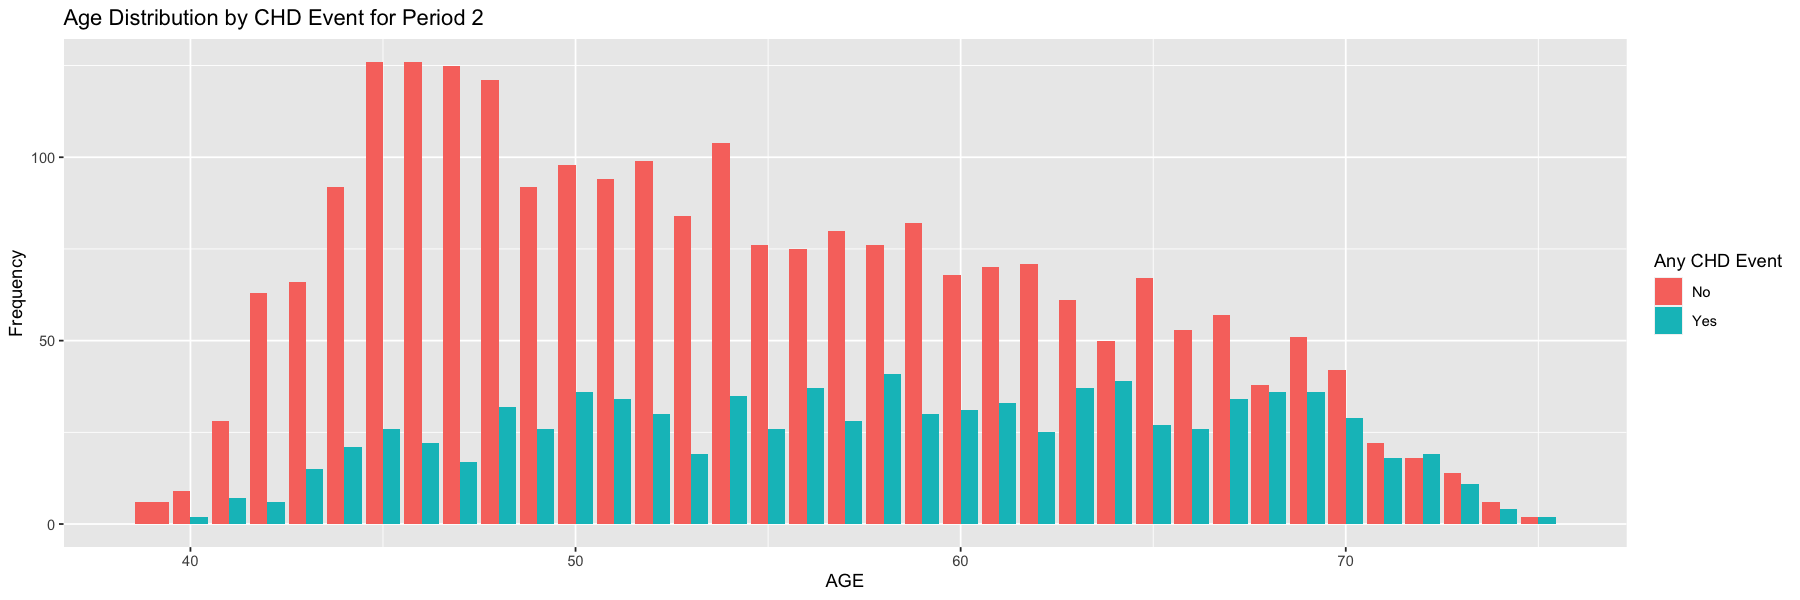

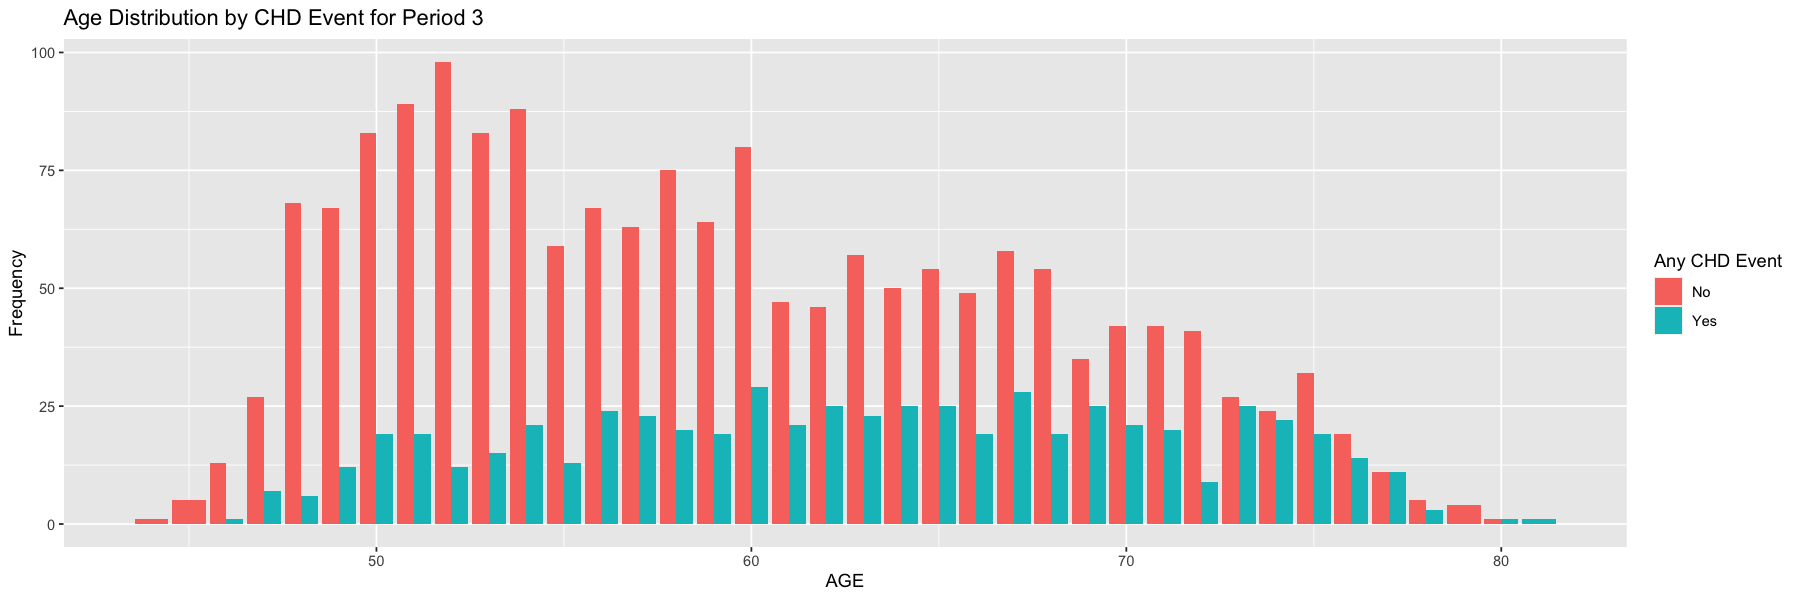

In [15]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = AGE, fill = as.factor(ANYCHD)), position = "dodge") + 
  ggtitle("Age Distribution by CHD Event for Period 1") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Any CHD Event", labels = c("No", "Yes"))
ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = AGE, fill = as.factor(ANYCHD)), position = "dodge") + 
  ggtitle("Age Distribution by CHD Event for Period 2") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Any CHD Event", labels = c("No", "Yes"))
ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = AGE, fill = as.factor(ANYCHD)), position = "dodge") + 
  ggtitle("Age Distribution by CHD Event for Period 3") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Any CHD Event", labels = c("No", "Yes"))

__*Incidence of CHD seems to be evenly spread accross the age spectrum and the CHD class is under-represented for all of the periods.*__

### 3. Age Distribution by Death Event

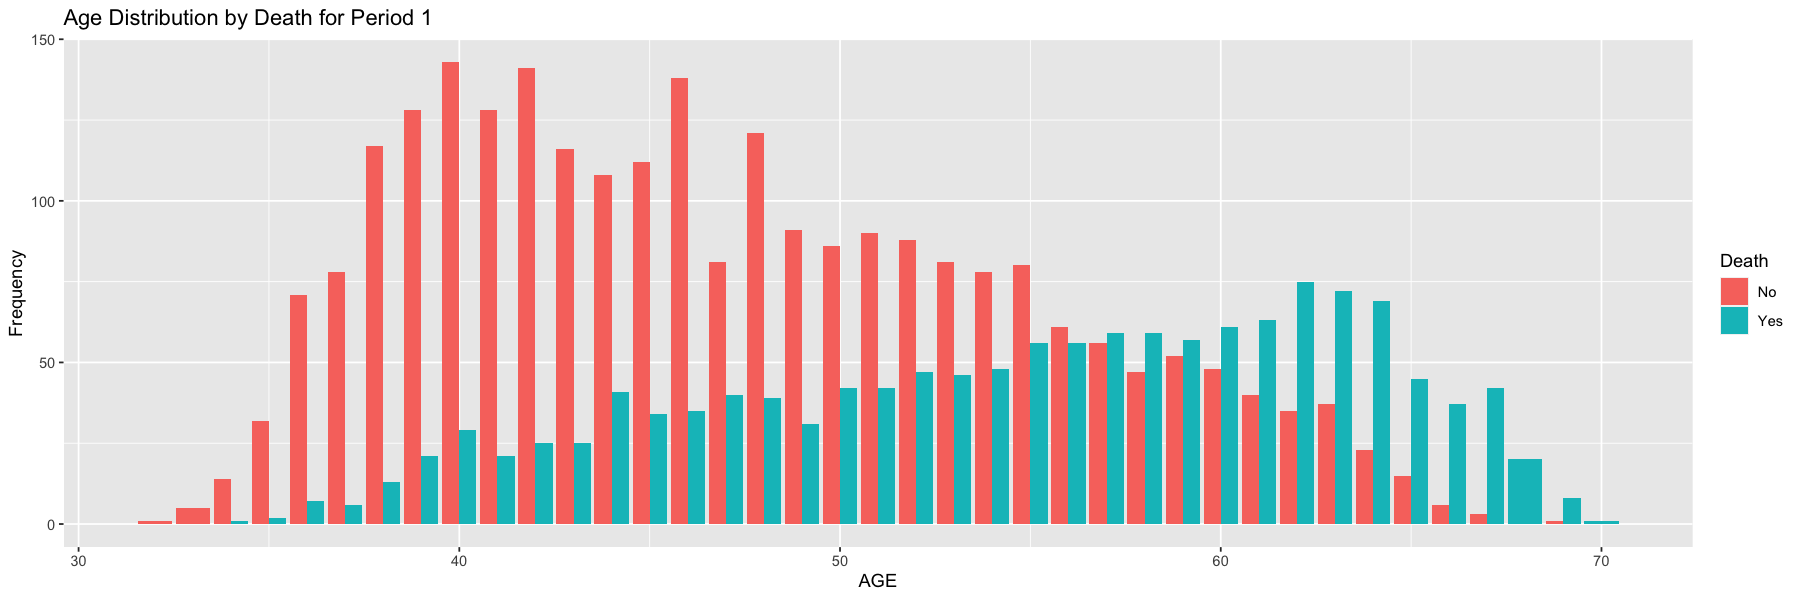

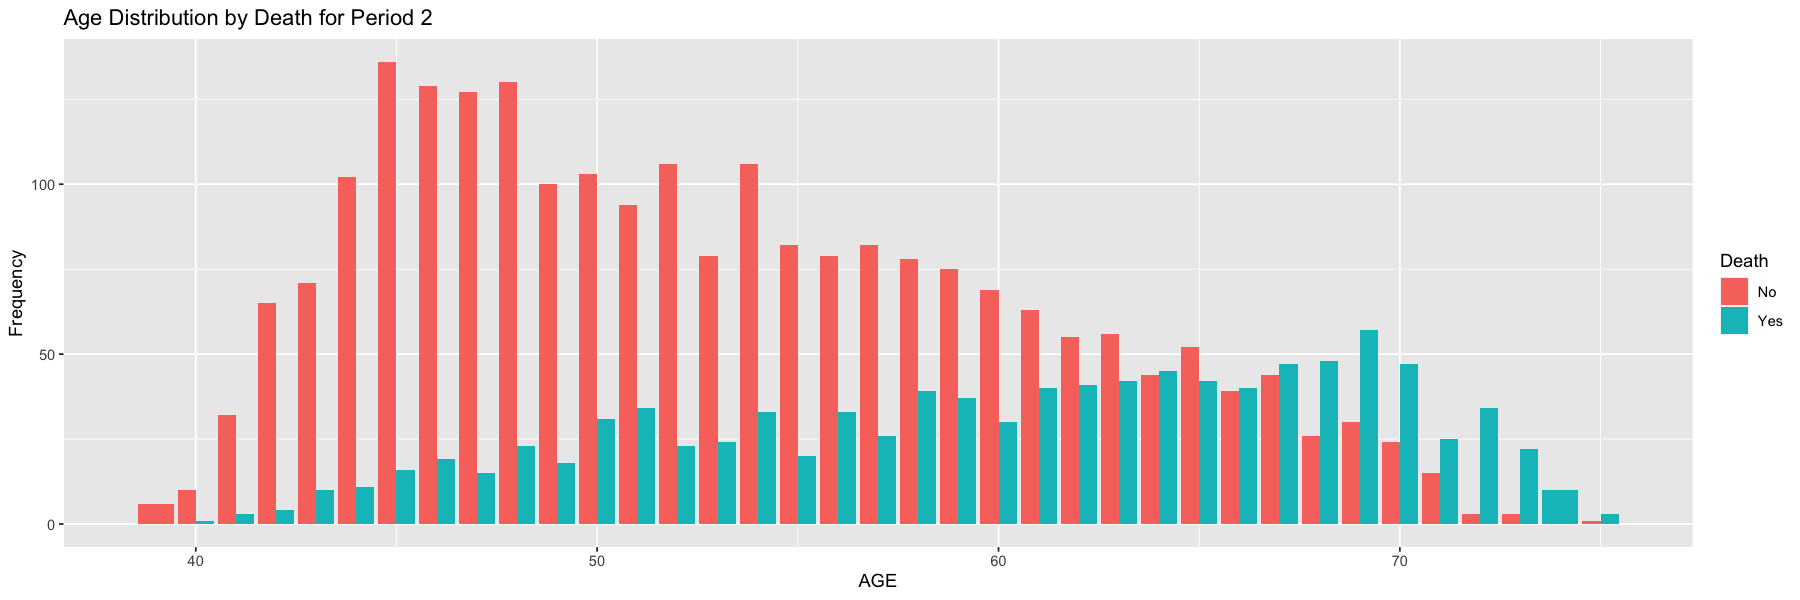

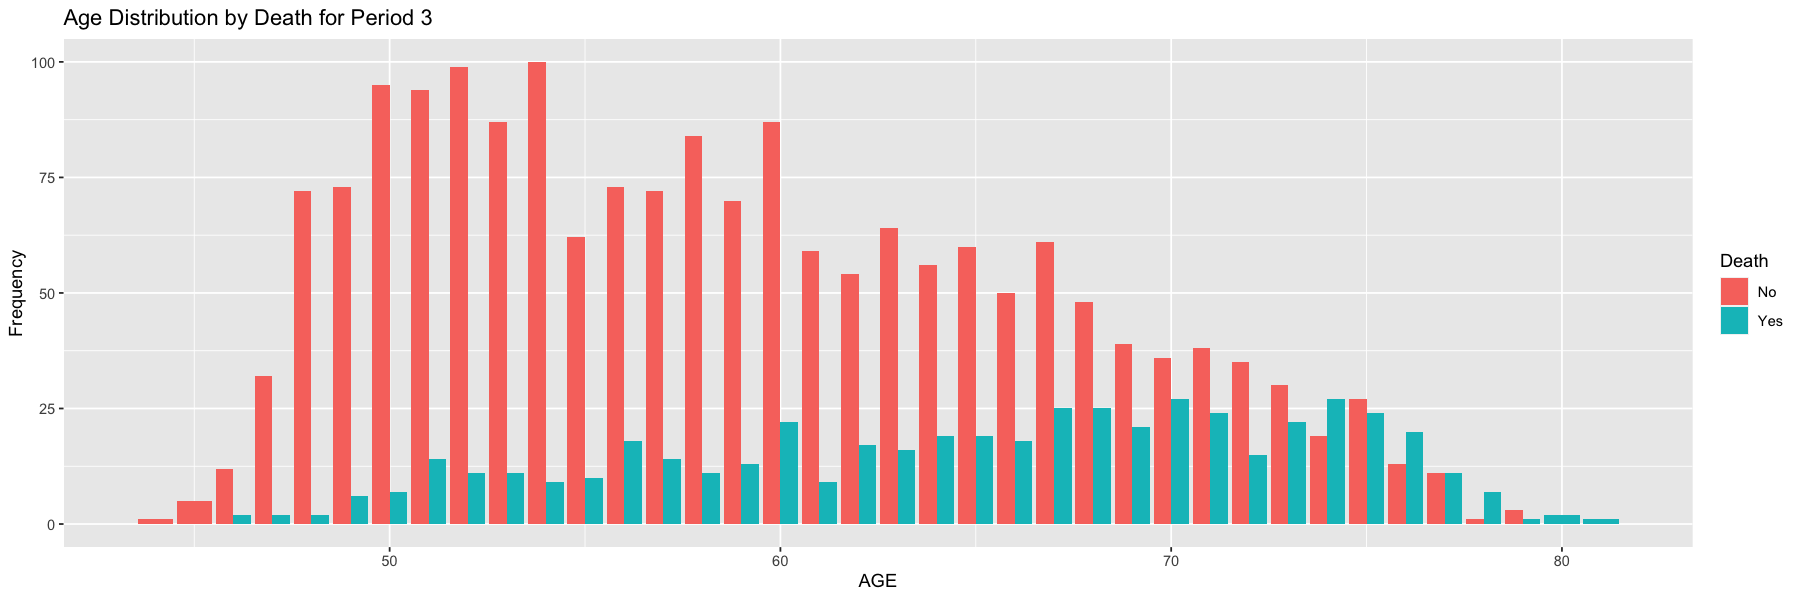

In [16]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = AGE, fill = as.factor(DEATH)), position = "dodge") + 
  ggtitle("Age Distribution by Death for Period 1") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Death", labels = c("No", "Yes"))
ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = AGE, fill = as.factor(DEATH)), position = "dodge") + 
  ggtitle("Age Distribution by Death for Period 2") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Death", labels = c("No", "Yes"))
ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = AGE, fill = as.factor(DEATH)), position = "dodge") + 
  ggtitle("Age Distribution by Death for Period 3") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Death", labels = c("No", "Yes"))

__*Incidence of death tends to increase as age increases.*__

### 4. Age Distribution by Gender

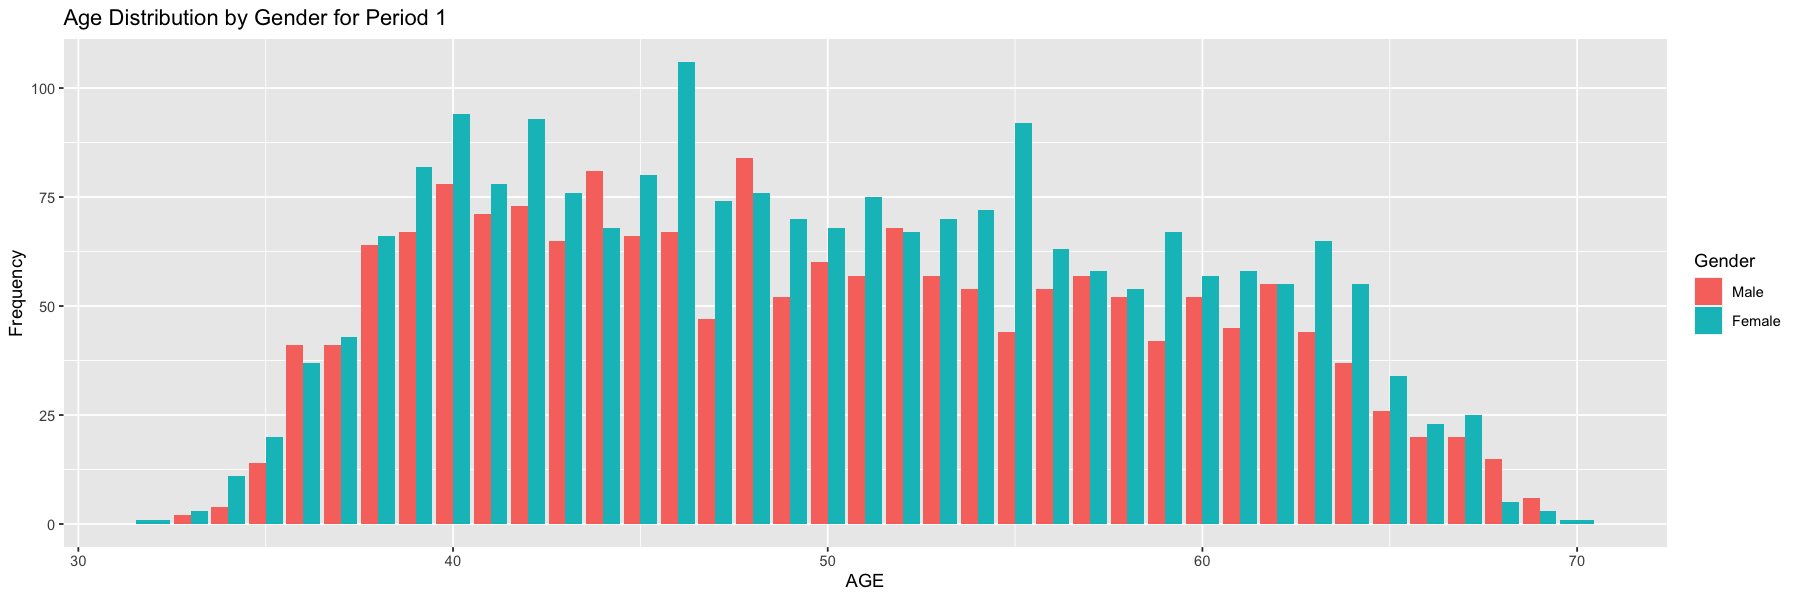

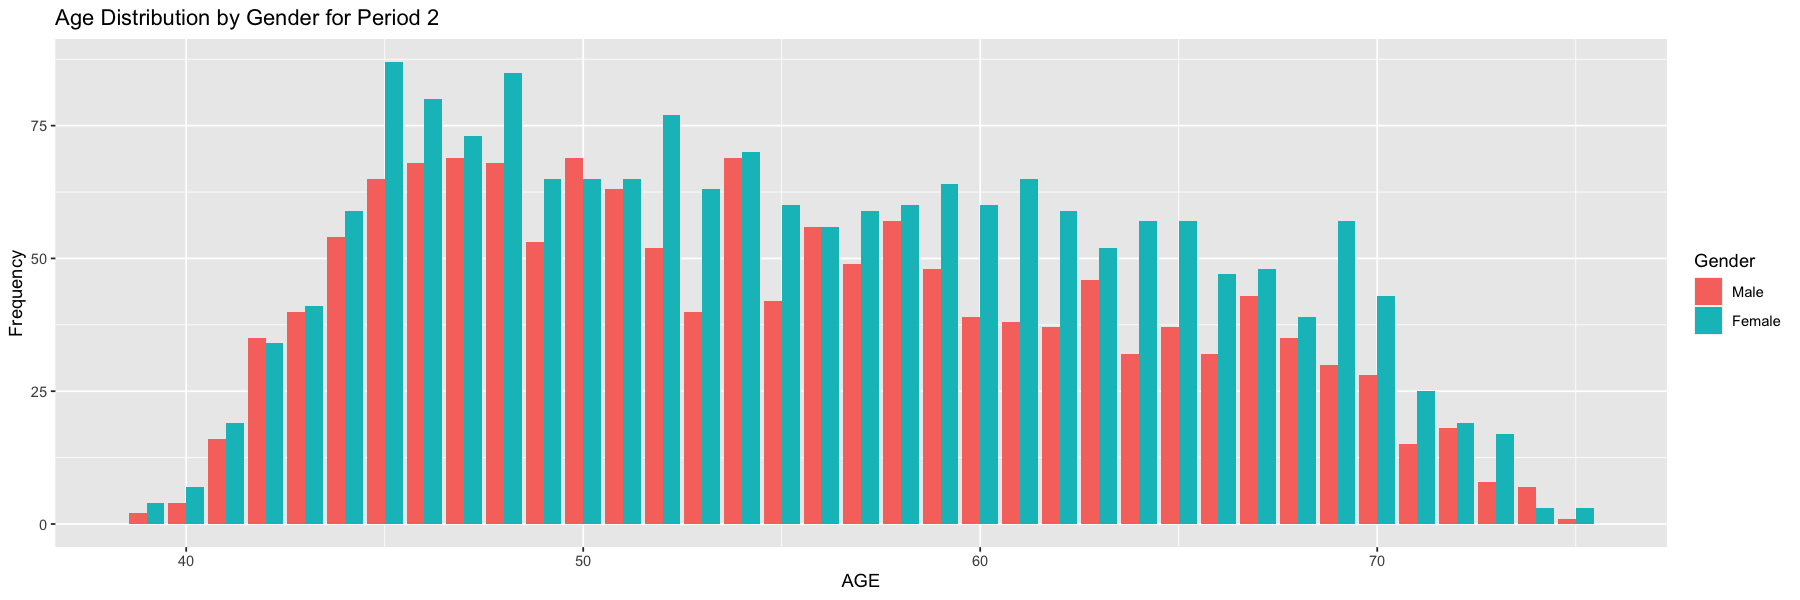

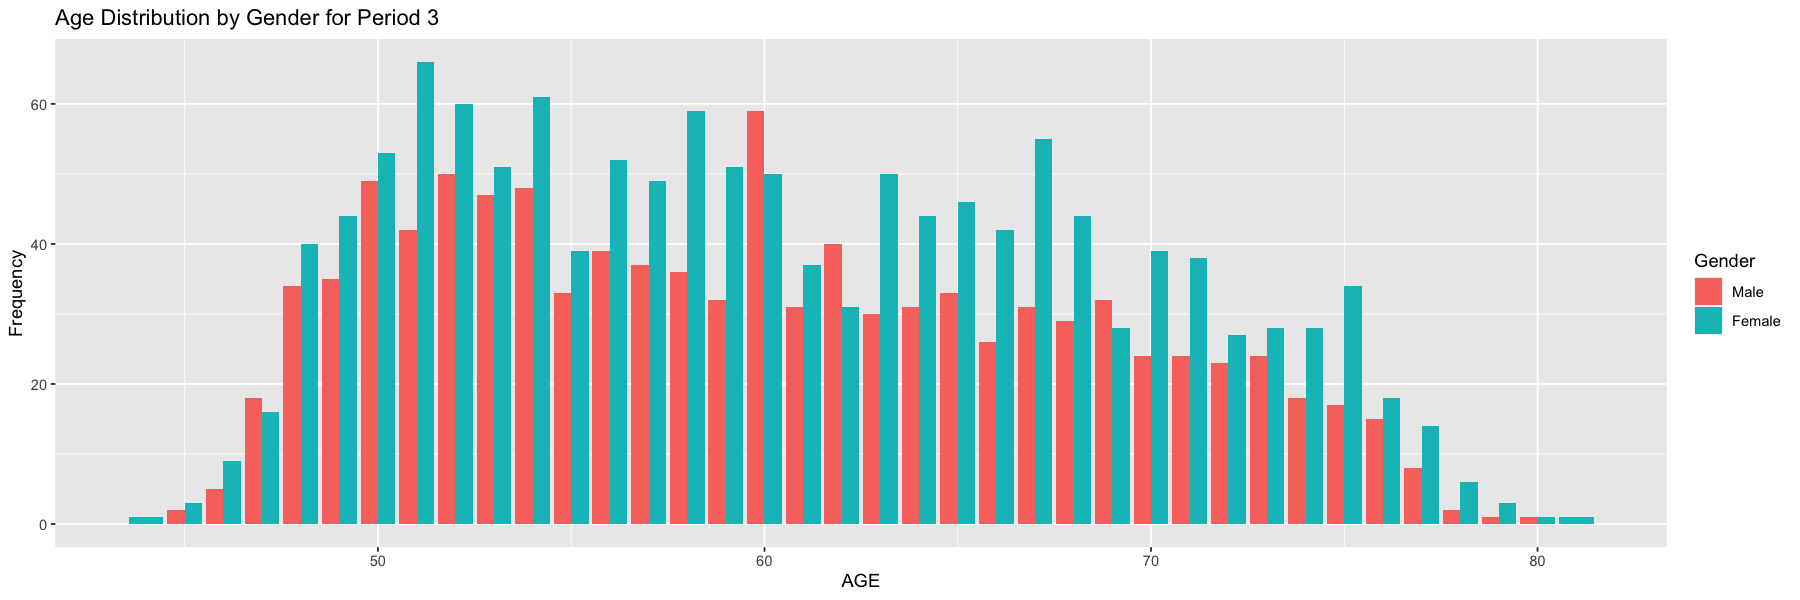

In [17]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = AGE, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Age Distribution by Gender for Period 1") +
  xlab("AGE") + 
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = AGE, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Age Distribution by Gender for Period 2") +
  xlab("AGE") + 
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = AGE, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Age Distribution by Gender for Period 3") +
  xlab("AGE") + 
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))

__*There are more women than men for all three periods.*__

### 5. Age Distribution by Smoking Status 

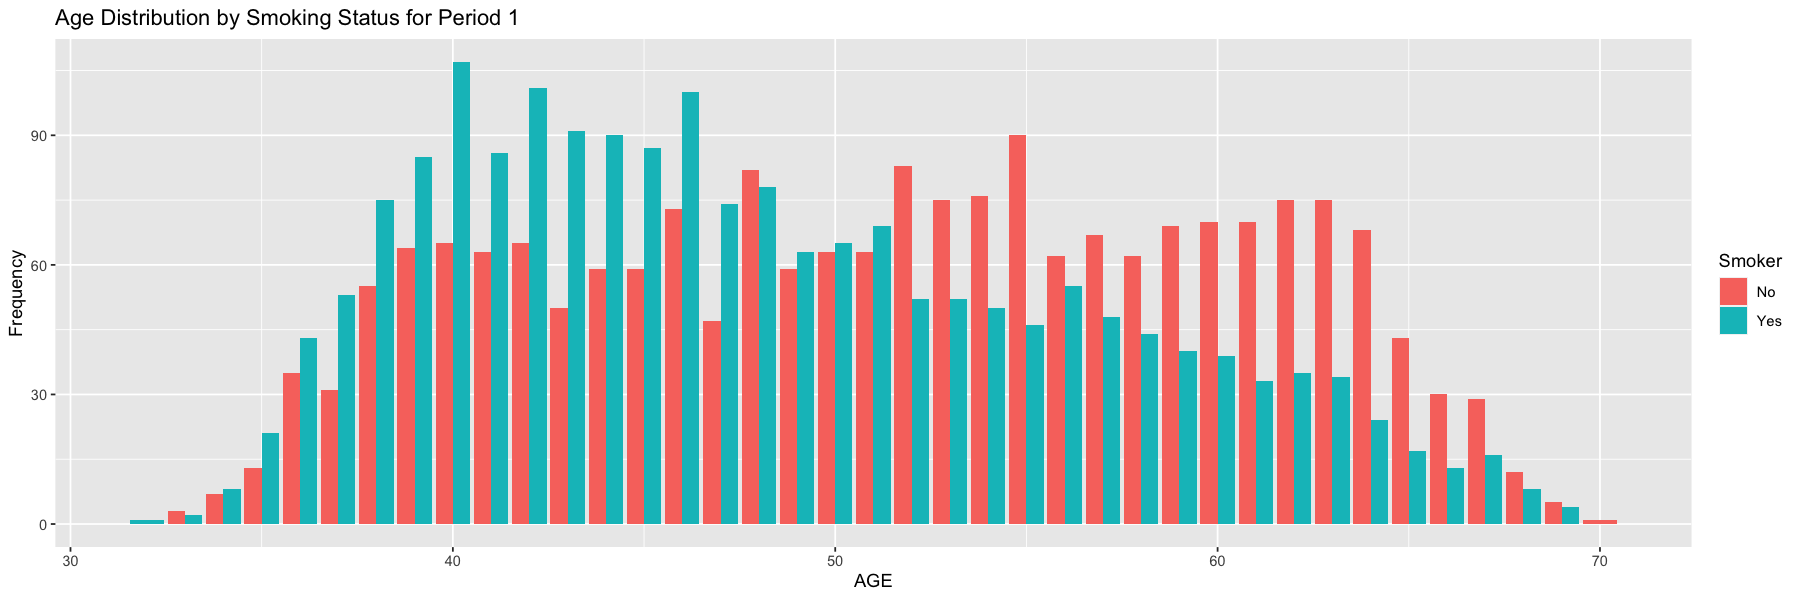

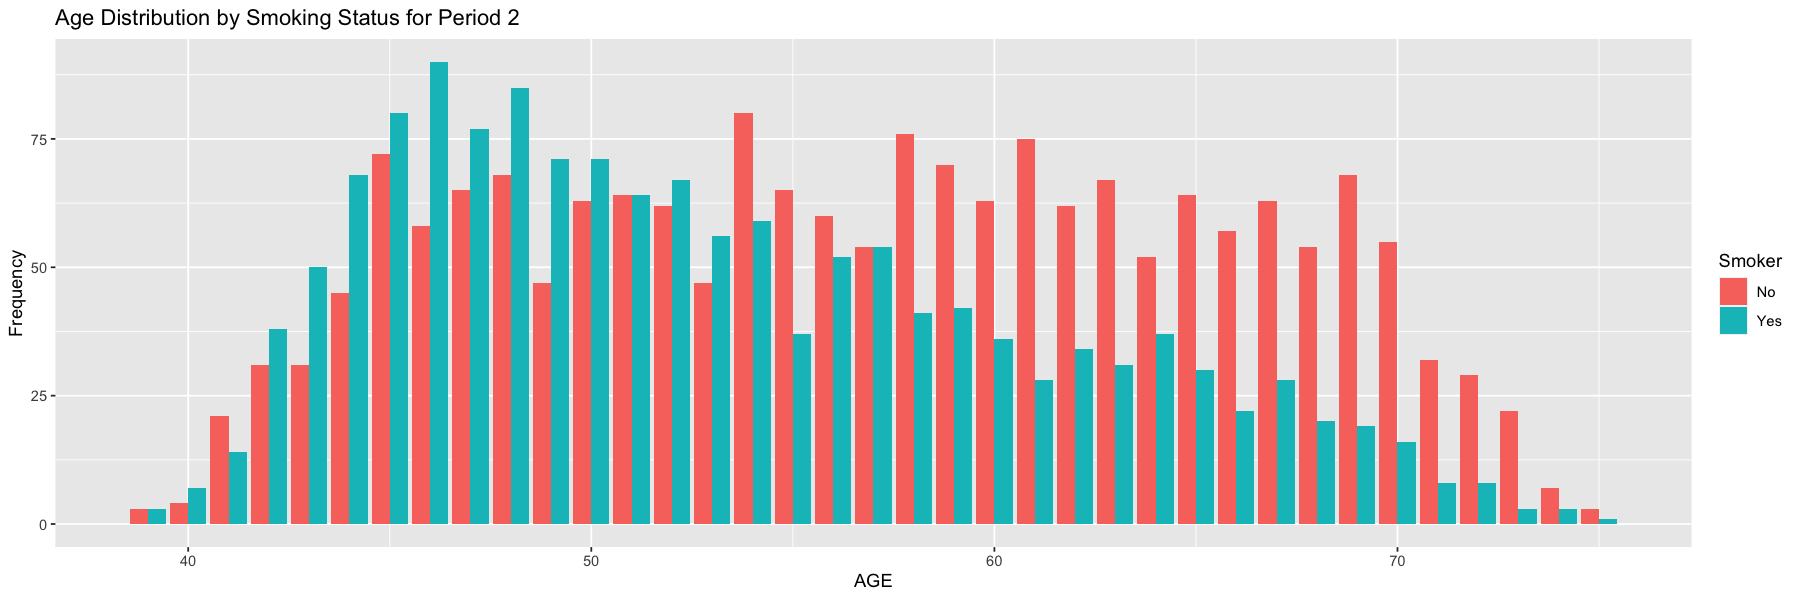

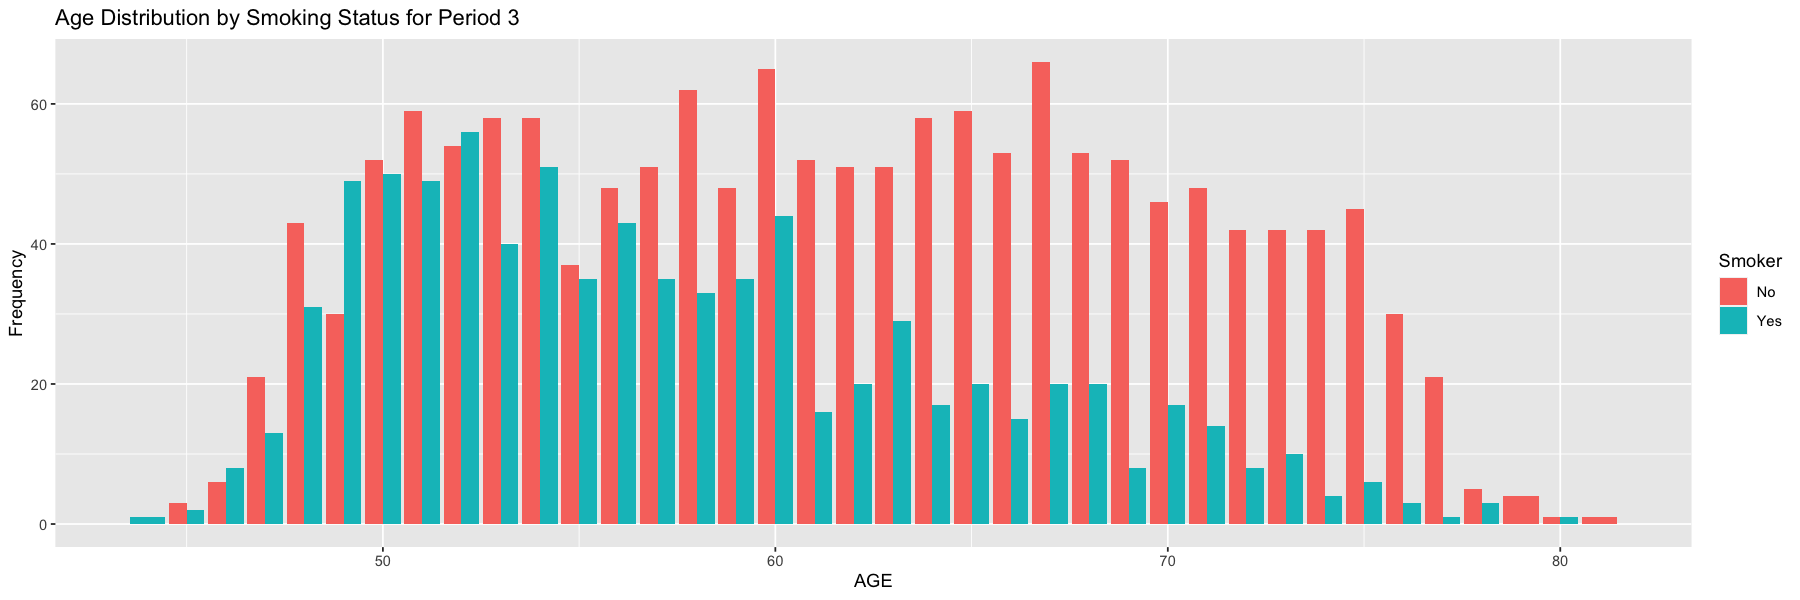

In [18]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = AGE, fill = as.factor(CURSMOKE)), position = "dodge") + 
  ggtitle("Age Distribution by Smoking Status for Period 1") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Smoker", labels = c("No", "Yes"))
ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = AGE, fill = as.factor(CURSMOKE)), position = "dodge") + 
  ggtitle("Age Distribution by Smoking Status for Period 2") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Smoker", labels = c("No", "Yes"))
ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = AGE, fill = as.factor(CURSMOKE)), position = "dodge") + 
  ggtitle("Age Distribution by Smoking Status for Period 3") +
  xlab("AGE") +
  ylab("Frequency") + scale_fill_discrete(name = "Smoker", labels = c("No", "Yes"))

**_The majoroty of smokers tend to be younger for all three period. Looking at the frequency scale, the number of smokers seems to have decreased over time._**

### 6. Age Distribution by Prevalence of Hypertension

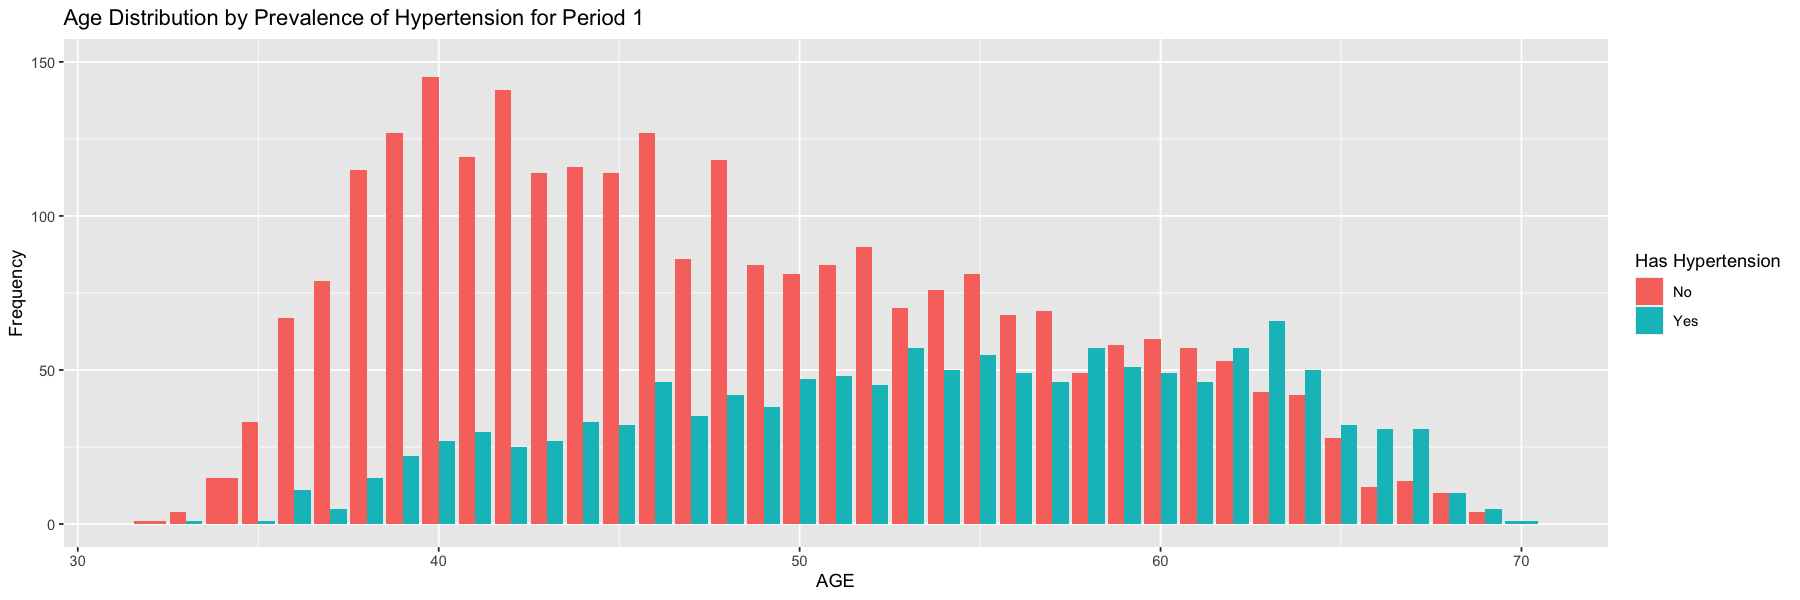

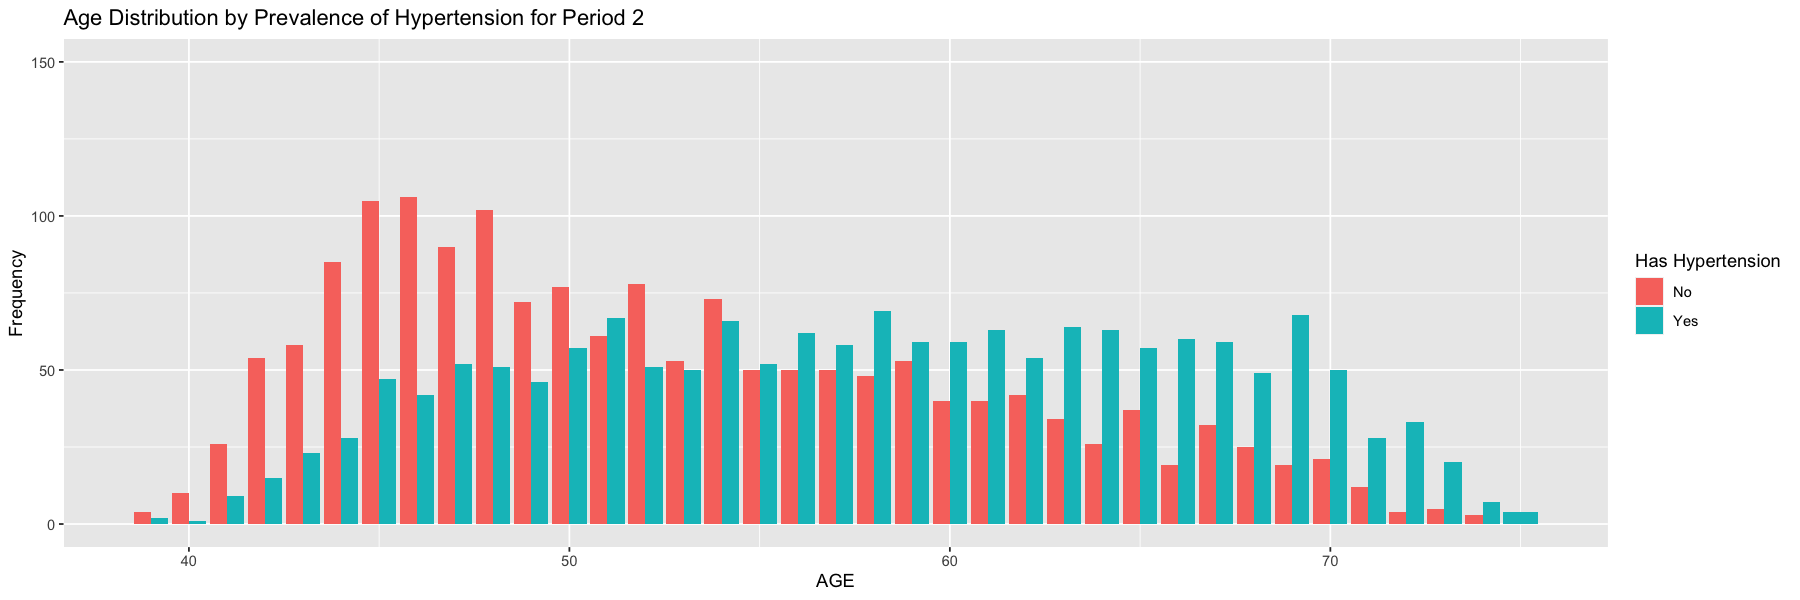

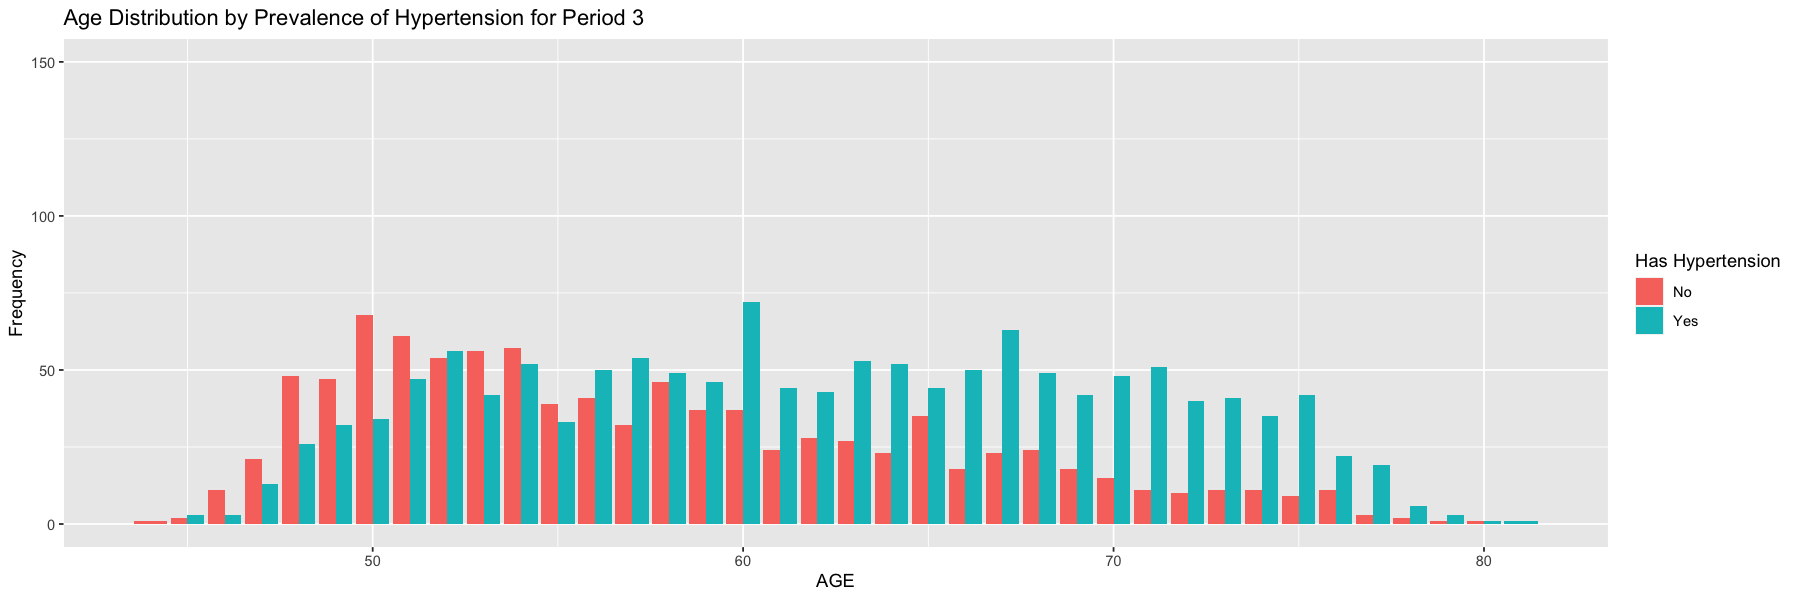

In [19]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = AGE, fill = as.factor(PREVHYP)), position = "dodge") + 
  ggtitle("Age Distribution by Prevalence of Hypertension for Period 1") +
  xlab("AGE") + ylim(0,150) +
  ylab("Frequency") + scale_fill_discrete(name = "Has Hypertension", labels = c("No", "Yes"))
ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = AGE, fill = as.factor(PREVHYP)), position = "dodge") + 
  ggtitle("Age Distribution by Prevalence of Hypertension for Period 2") +
  xlab("AGE") + ylim(0,150) +
  ylab("Frequency") + scale_fill_discrete(name = "Has Hypertension", labels = c("No", "Yes"))
ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = AGE, fill = as.factor(PREVHYP)), position = "dodge") + 
  ggtitle("Age Distribution by Prevalence of Hypertension for Period 3") +
  xlab("AGE") + ylim(0,150) +
  ylab("Frequency") + scale_fill_discrete(name = "Has Hypertension", labels = c("No", "Yes"))

**_The age when there are more individuals with high blood pressure than healthy individuals seems to have decreased over time, from about 63 in Period 1 to about 55 in Periods 2 and 3._**

### 6. Age Distribution By Prevalence of Diabetes

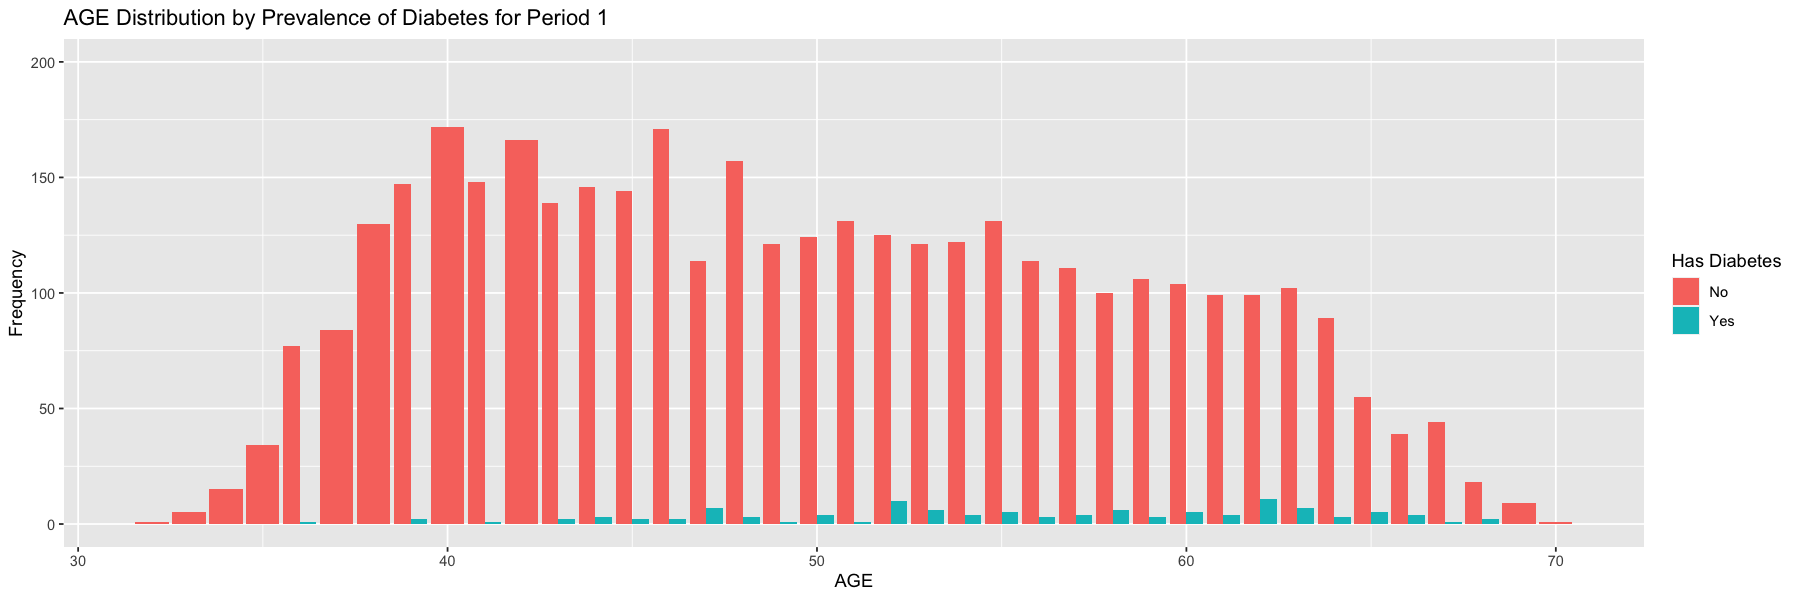

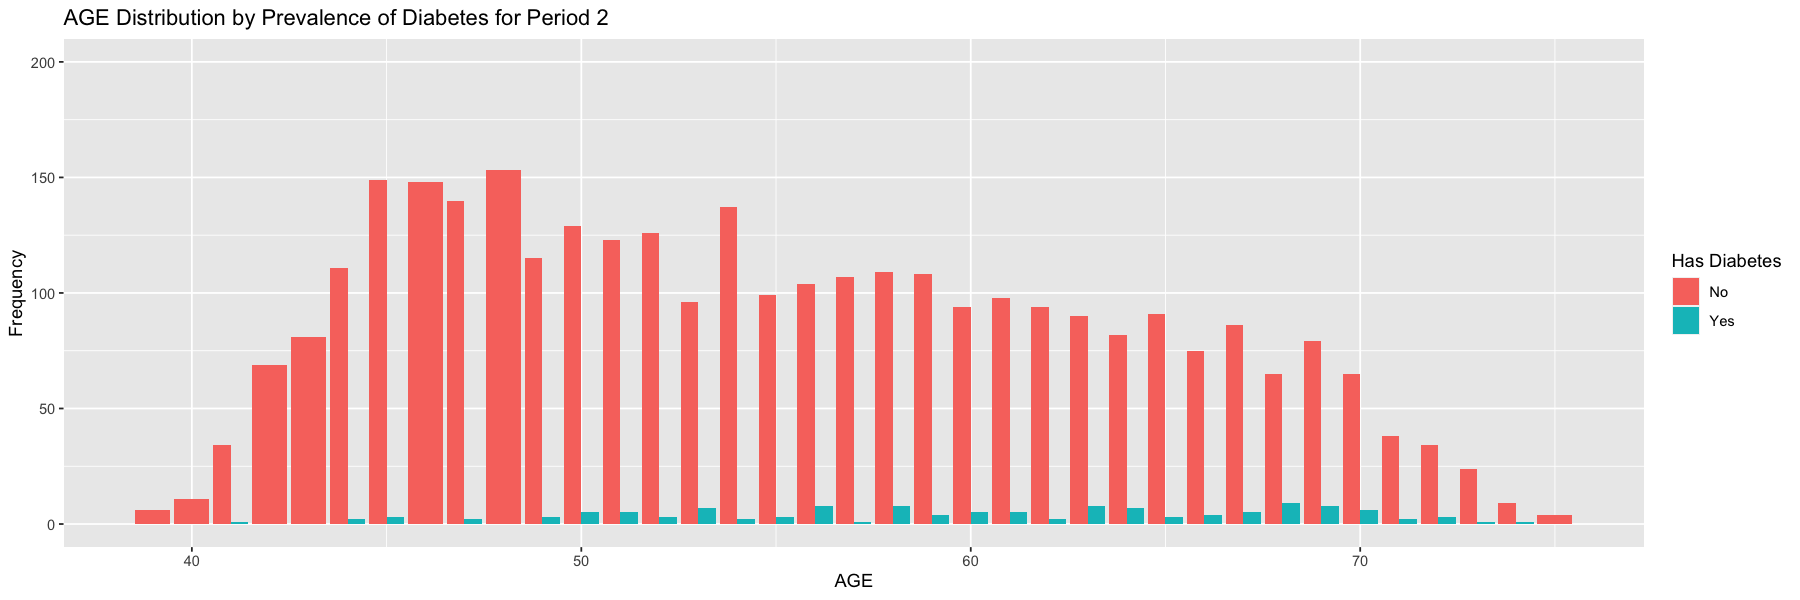

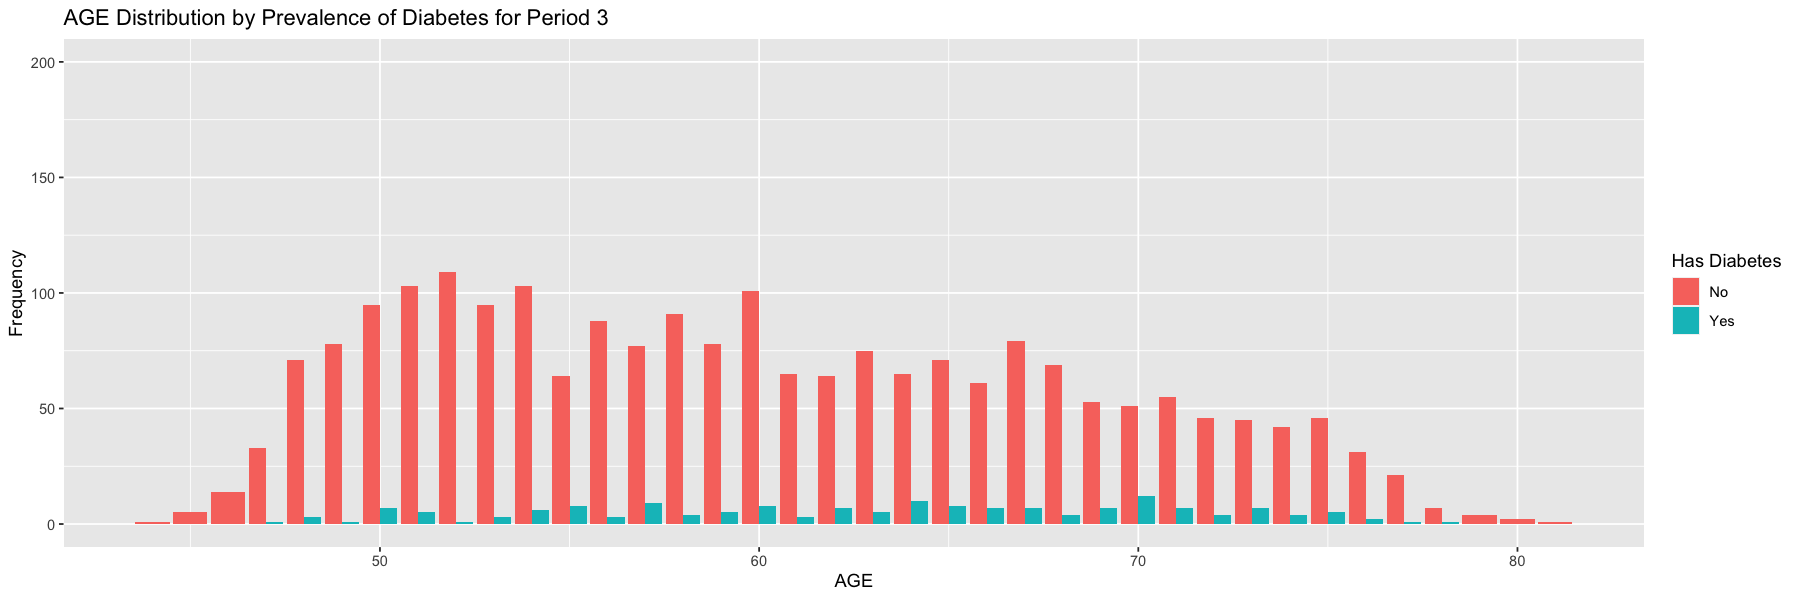

In [20]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = AGE, fill = as.factor(DIABETES)), position = "dodge") + 
  ggtitle("AGE Distribution by Prevalence of Diabetes for Period 1") +
  xlab("AGE") + ylim(0,200) +
  ylab("Frequency") + scale_fill_discrete(name = "Has Diabetes", labels = c("No", "Yes"))
ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = AGE, fill = as.factor(DIABETES)), position = "dodge") + 
  ggtitle("AGE Distribution by Prevalence of Diabetes for Period 2") +
  xlab("AGE") + ylim(0,200) +
  ylab("Frequency") + scale_fill_discrete(name = "Has Diabetes", labels = c("No", "Yes"))
ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = AGE, fill = as.factor(DIABETES)), position = "dodge") + 
  ggtitle("AGE Distribution by Prevalence of Diabetes for Period 3") +
  xlab("AGE") + ylim(0,200) +
  ylab("Frequency") + scale_fill_discrete(name = "Has Diabetes", labels = c("No", "Yes"))

**_The large majority of people are not diabetic across all AGE groups, which provides little insight on the impact of diabetes in the risk for CHD and death._**

### 7. Age Distribution for BMI

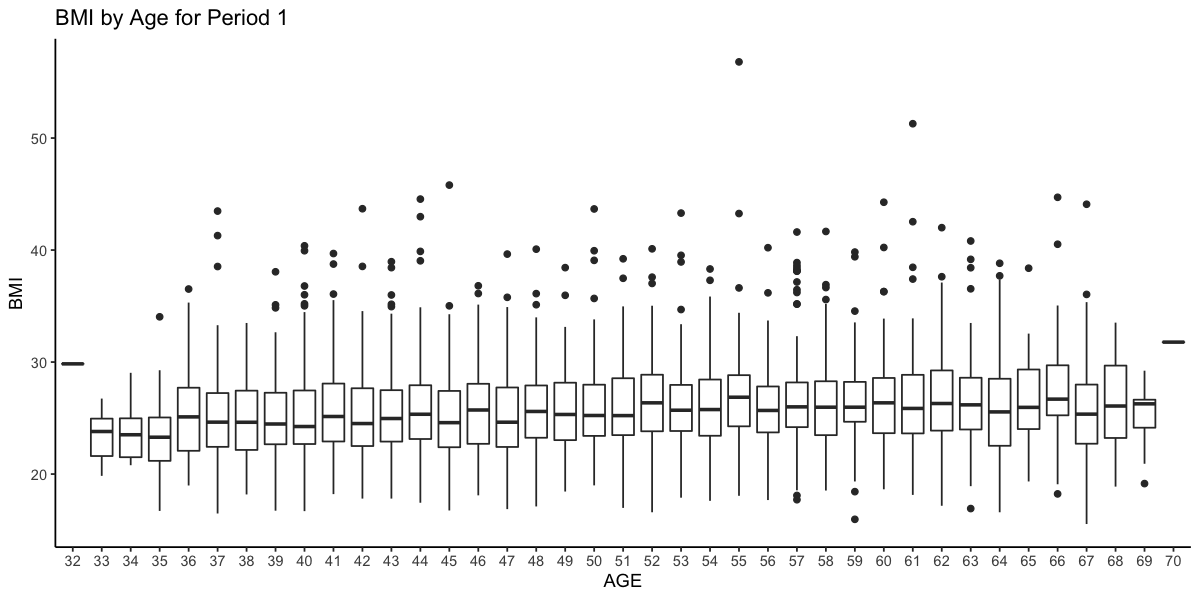

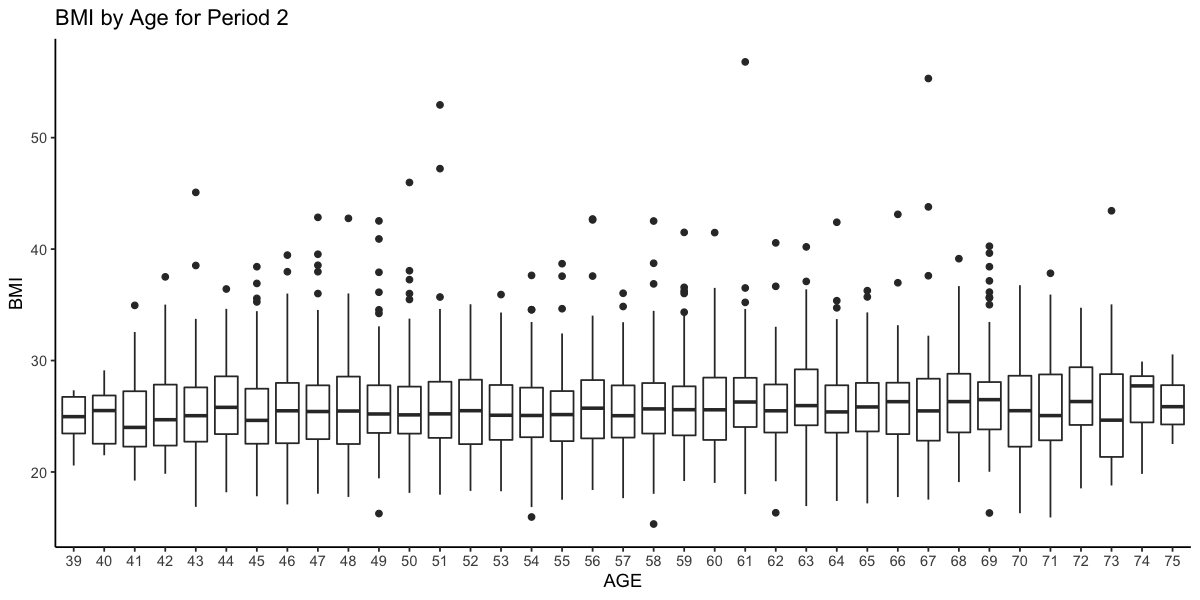

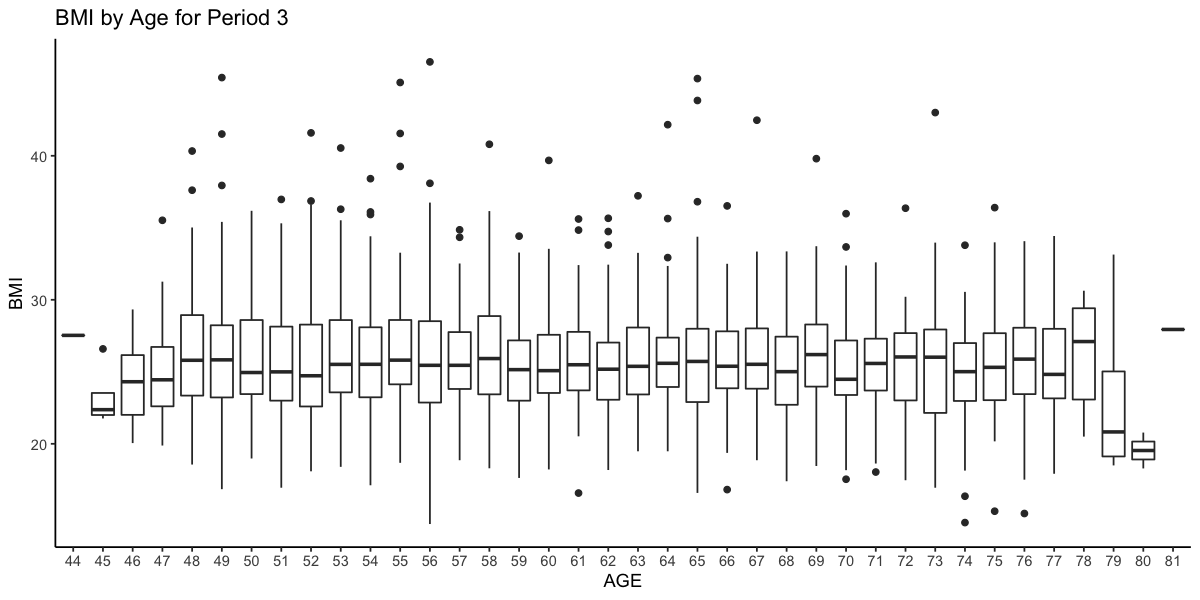

In [37]:
options(repr.plot.width=10, repr.plot.height=5)
ggplot(framinghamP1, aes(x = as.factor(AGE), y = BMI)) + geom_boxplot() + 
    ggtitle("BMI by Age for Period 1") + xlab("AGE")+ theme(panel.grid.major = element_blank(), 
                                                            panel.grid.minor = element_blank(), 
                                                            panel.background = element_blank(), 
                                                            axis.line = element_line(colour = "black"))

ggplot(framinghamP2, aes(x = as.factor(AGE), y = BMI)) + geom_boxplot() + 
    ggtitle("BMI by Age for Period 2") + xlab("AGE")+ theme(panel.grid.major = element_blank(), 
                                                            panel.grid.minor = element_blank(), 
                                                            panel.background = element_blank(), 
                                                            axis.line = element_line(colour = "black"))

ggplot(framinghamP3, aes(x = as.factor(AGE), y = BMI)) + geom_boxplot() + 
    ggtitle("BMI by Age for Period 3") + xlab("AGE")+ theme(panel.grid.major = element_blank(), 
                                                            panel.grid.minor = element_blank(), 
                                                            panel.background = element_blank(), 
                                                            axis.line = element_line(colour = "black"))

__*BMI seems to be evenly distributed across all ages, which implies that there is no relationship between AGE and BMI*__

## BMI

### 1. Histogram

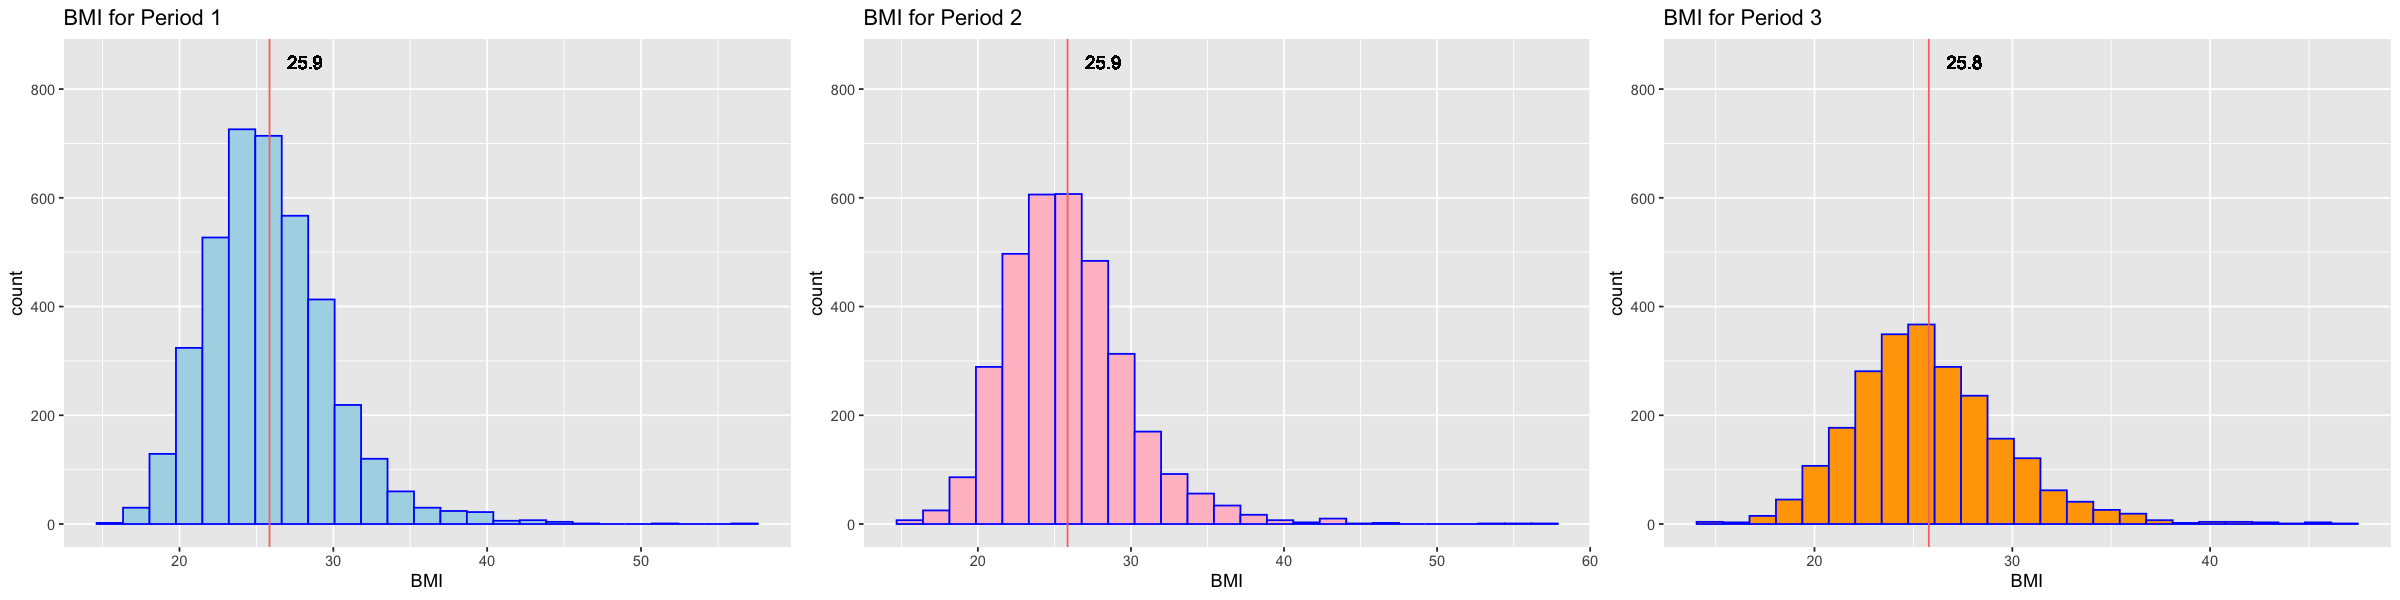

In [22]:
m1 = mean(framinghamP1$BMI, na.rm=TRUE)
m2 = mean(framinghamP2$BMI, na.rm=TRUE)
m3 = mean(framinghamP3$BMI, na.rm=TRUE)
options(repr.plot.width=20, repr.plot.height=5)
a=ggplot(data = framinghamP1, aes(x = BMI)) + ylim(0,850) + 
    geom_histogram(bins = 25, fill='lightblue', color = "blue") + 
    geom_vline(aes(xintercept = m1, colour = "red")) + theme(legend.position = "none") + 
    geom_text(x= m1, y = 850,label = round(m1,1), hjust = -0.5) + ggtitle('BMI for Period 1')
b=ggplot(data = framinghamP2, aes(x = BMI)) + ylim(0,850) + 
    geom_histogram(bins = 25, fill='pink', color = "blue") +
    geom_vline(aes(xintercept = m2, colour = "red")) + theme(legend.position = "none") + 
    geom_text(x= m2, y = 850,label = round(m2,1), hjust = -0.5) + ggtitle('BMI for Period 2')
c=ggplot(data = framinghamP3, aes(x = BMI)) + ylim(0,850) + 
    geom_histogram(bins = 25, fill='orange', color = "blue") +
    geom_vline(aes(xintercept = m3, colour = "red")) + theme(legend.position = "none") + 
    geom_text(x= m3, y = 850,label = round(m3,1), hjust = -0.5) + ggtitle('BMI for Period 3')
grid.arrange(a, b, c, ncol = 3)

**_BMI distribution stayed the same over the 3 period, however it seems that the number of participants decreased over time._**

### 2. BMI Distribution by Prevalence of Stroke

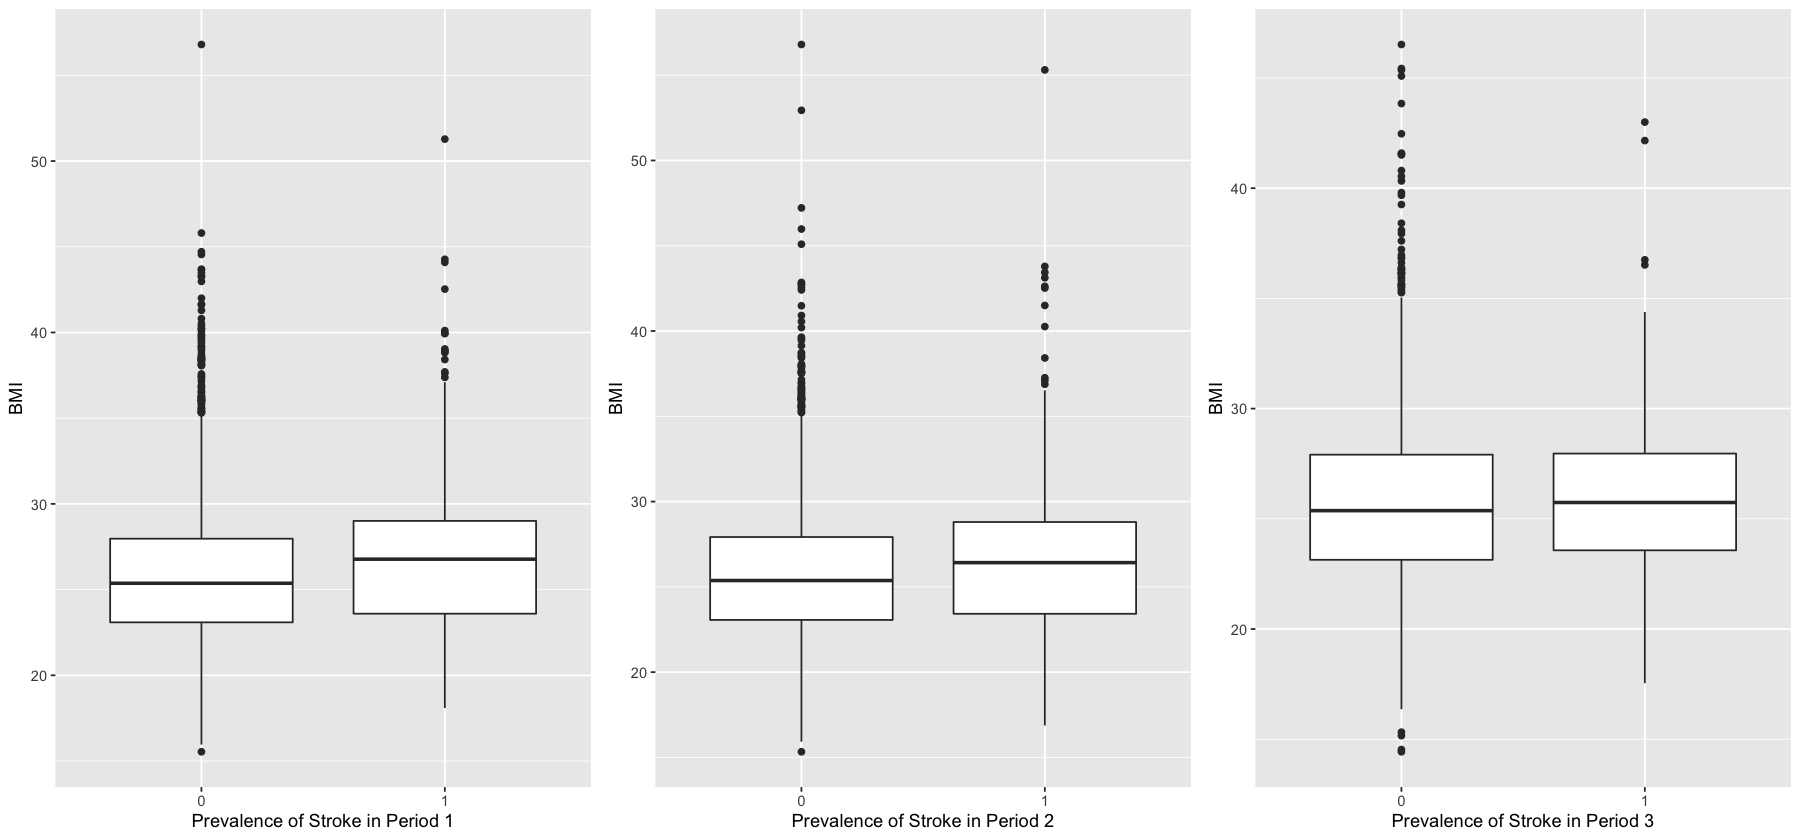

In [23]:
options(repr.plot.width=15, repr.plot.height=7)
a=ggplot(framinghamP1, aes(x = as.factor(STROKE), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Stroke in Period 1", y = "BMI")
b=ggplot(framinghamP2, aes(x = as.factor(STROKE), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Stroke in Period 2", y = "BMI")
c=ggplot(framinghamP3, aes(x = as.factor(STROKE), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Stroke in Period 3", y = "BMI")
grid.arrange(a, b, c, ncol = 3)

**_BMI does not vary significantly between people who had a stroke and people who didn't have a stroke for all periods_**

### 3. BMI Distribution by Prevalence of Hypertension

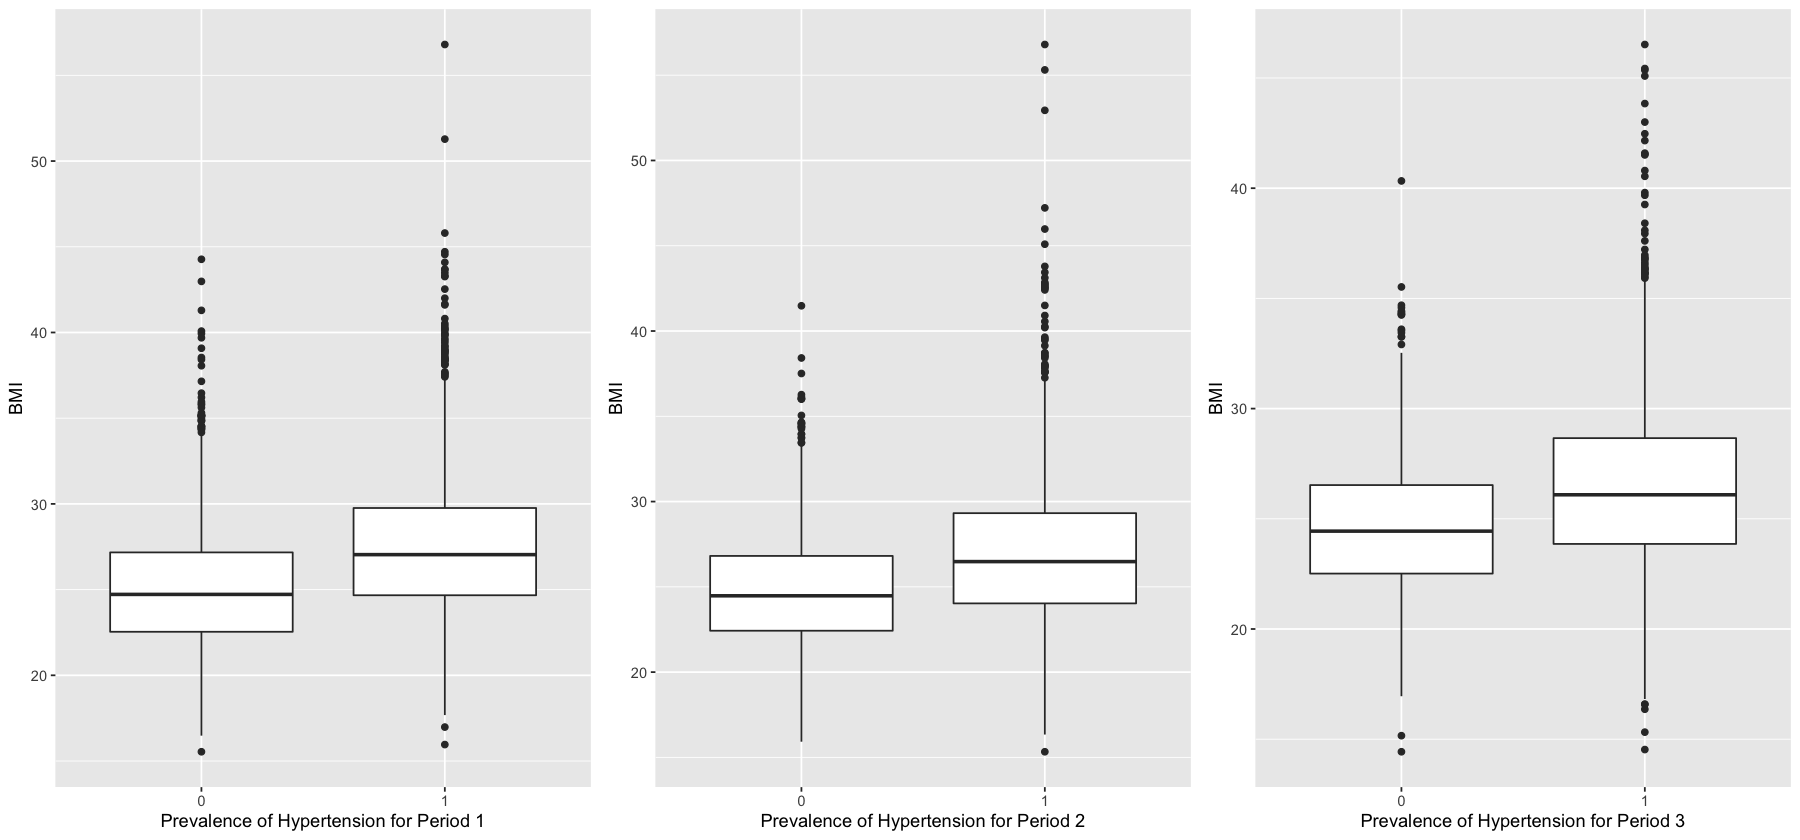

In [24]:
options(repr.plot.width=15, repr.plot.height=7)
a=ggplot(framinghamP1, aes(x = as.factor(PREVHYP), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Hypertension for Period 1", y = "BMI")
b=ggplot(framinghamP2, aes(x = as.factor(PREVHYP), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Hypertension for Period 2", y = "BMI")
c=ggplot(framinghamP3, aes(x = as.factor(PREVHYP), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Hypertension for Period 3", y = "BMI")
grid.arrange(a, b, c, ncol = 3)

**_BMI seems to be slightly higher for people with high blood pressure for all periods_**

### 4. BMI Distribution by Prevalence of Diabetes

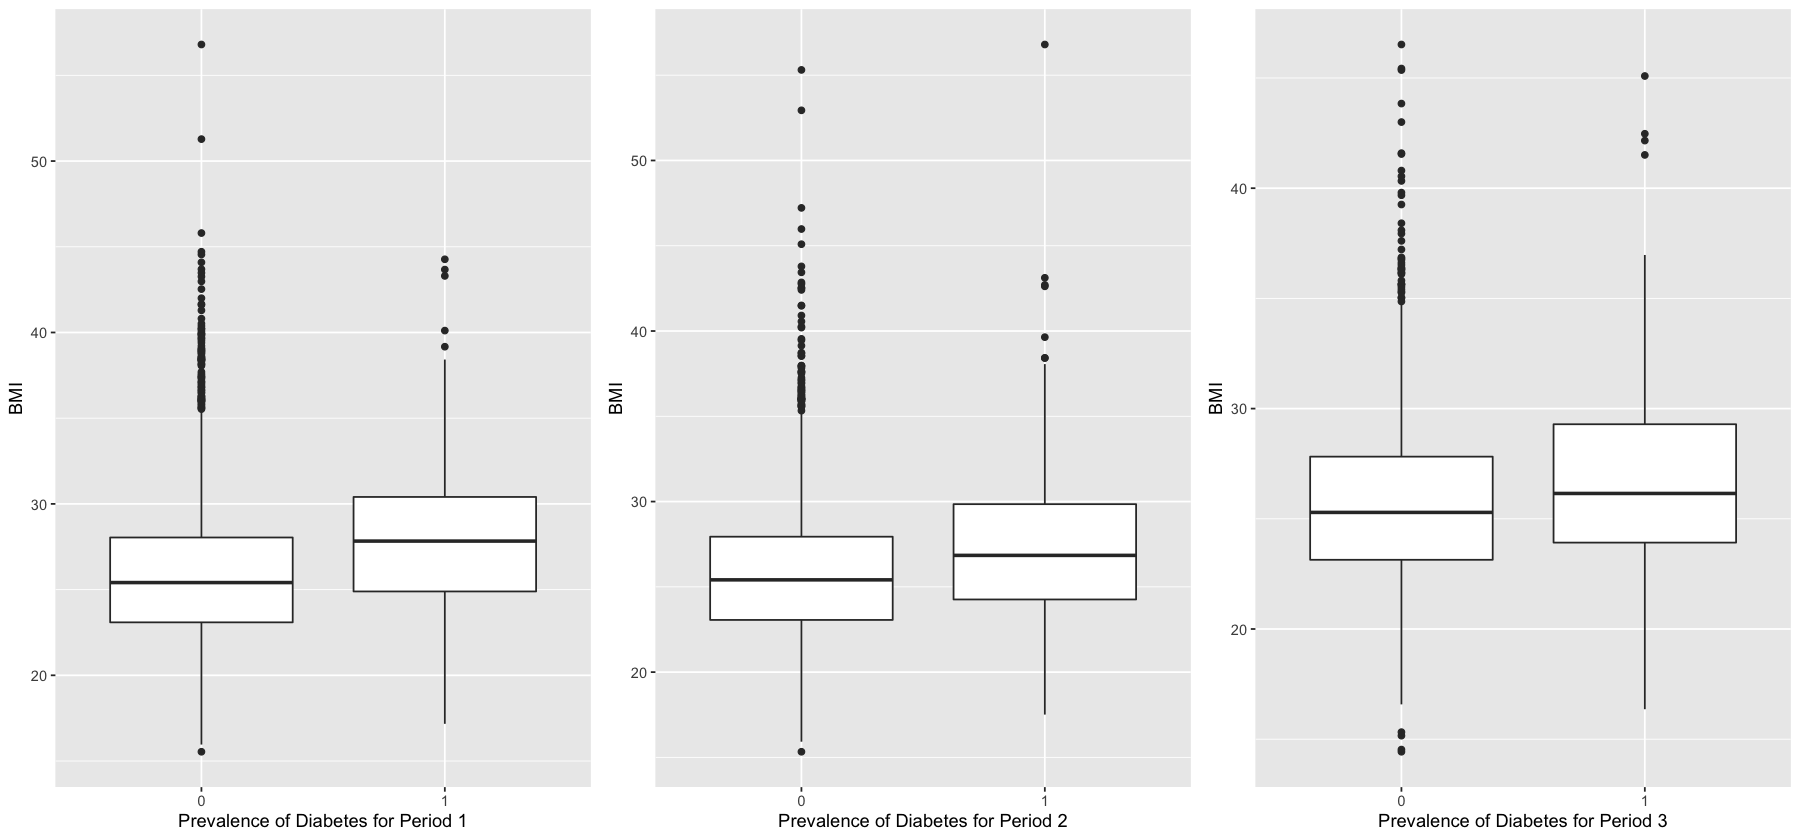

In [25]:
options(repr.plot.width=15, repr.plot.height=7)
a=ggplot(framinghamP1, aes(x = as.factor(DIABETES), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Diabetes for Period 1", y = "BMI")
b=ggplot(framinghamP2, aes(x = as.factor(DIABETES), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Diabetes for Period 2", y = "BMI")
c=ggplot(framinghamP3, aes(x = as.factor(DIABETES), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Diabetes for Period 3", y = "BMI")
grid.arrange(a, b, c, ncol = 3)

**_BMI seems to be slightly higher for people with diabetes for all periods_**

### 5. BMI Distribution by Prevalence of Coronary Heart Disease

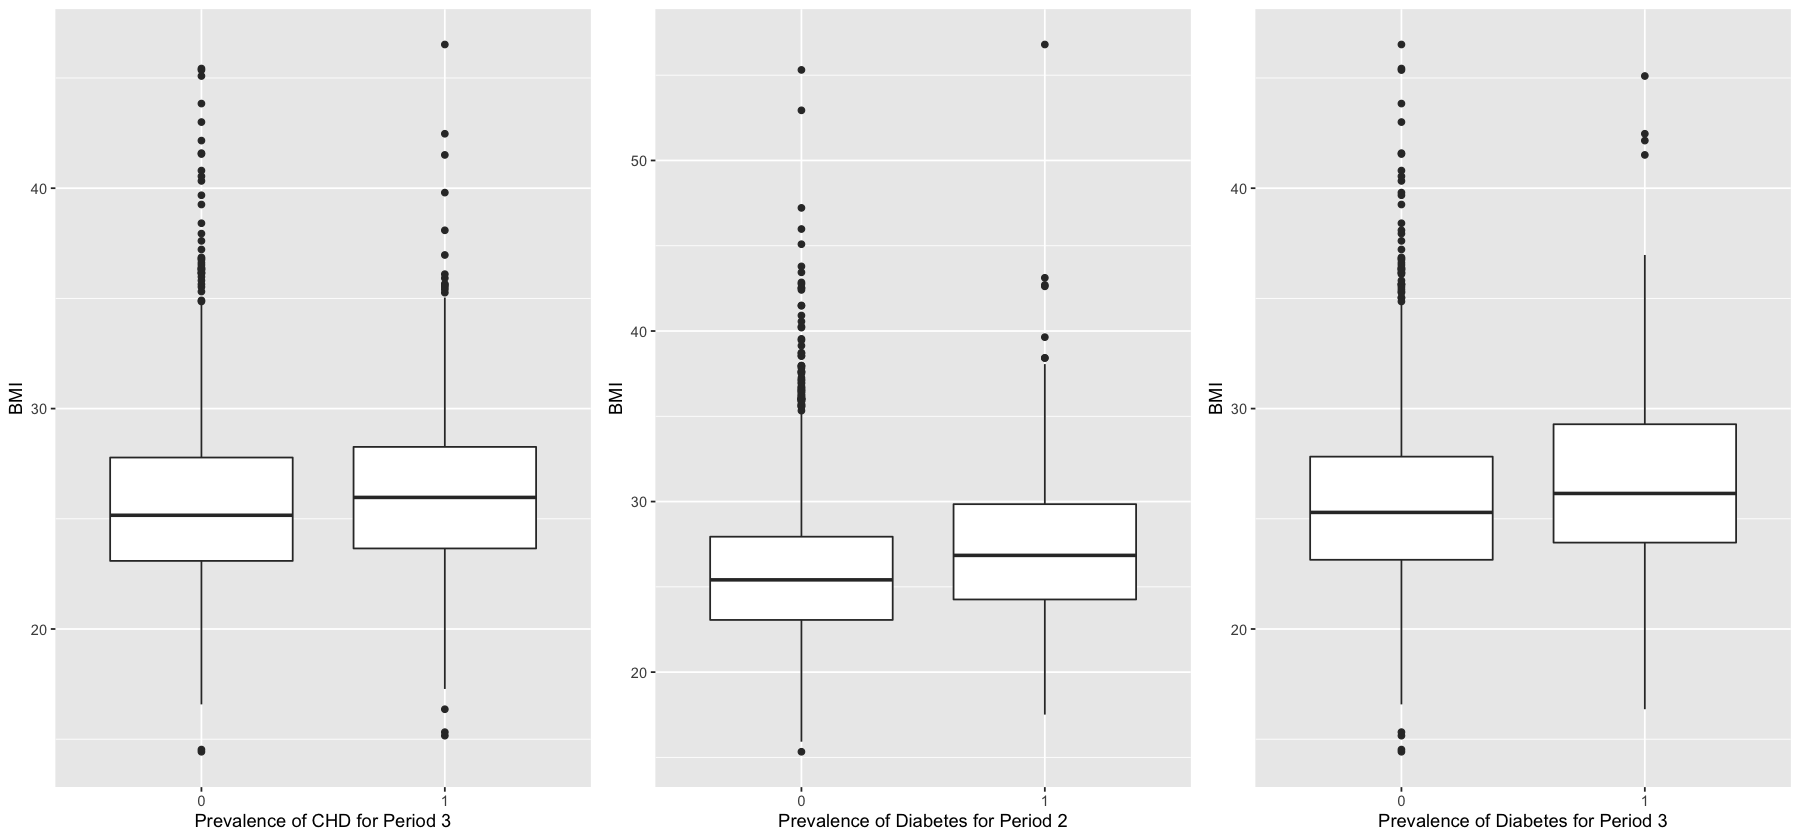

In [26]:
options(repr.plot.width=15, repr.plot.height=7)
a=ggplot(framinghamP1, aes(x = as.factor(ANYCHD), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of CHD for Period 1", y = "BMI")
a=ggplot(framinghamP2, aes(x = as.factor(ANYCHD), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of CHD for Period 2", y = "BMI")
a=ggplot(framinghamP3, aes(x = as.factor(ANYCHD), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of CHD for Period 3", y = "BMI")
grid.arrange(a, b, c, ncol = 3)

**_BMI seems to be slightly higher for people with heart disease_**

### 6. BMI Distribution by Prevalence of Death

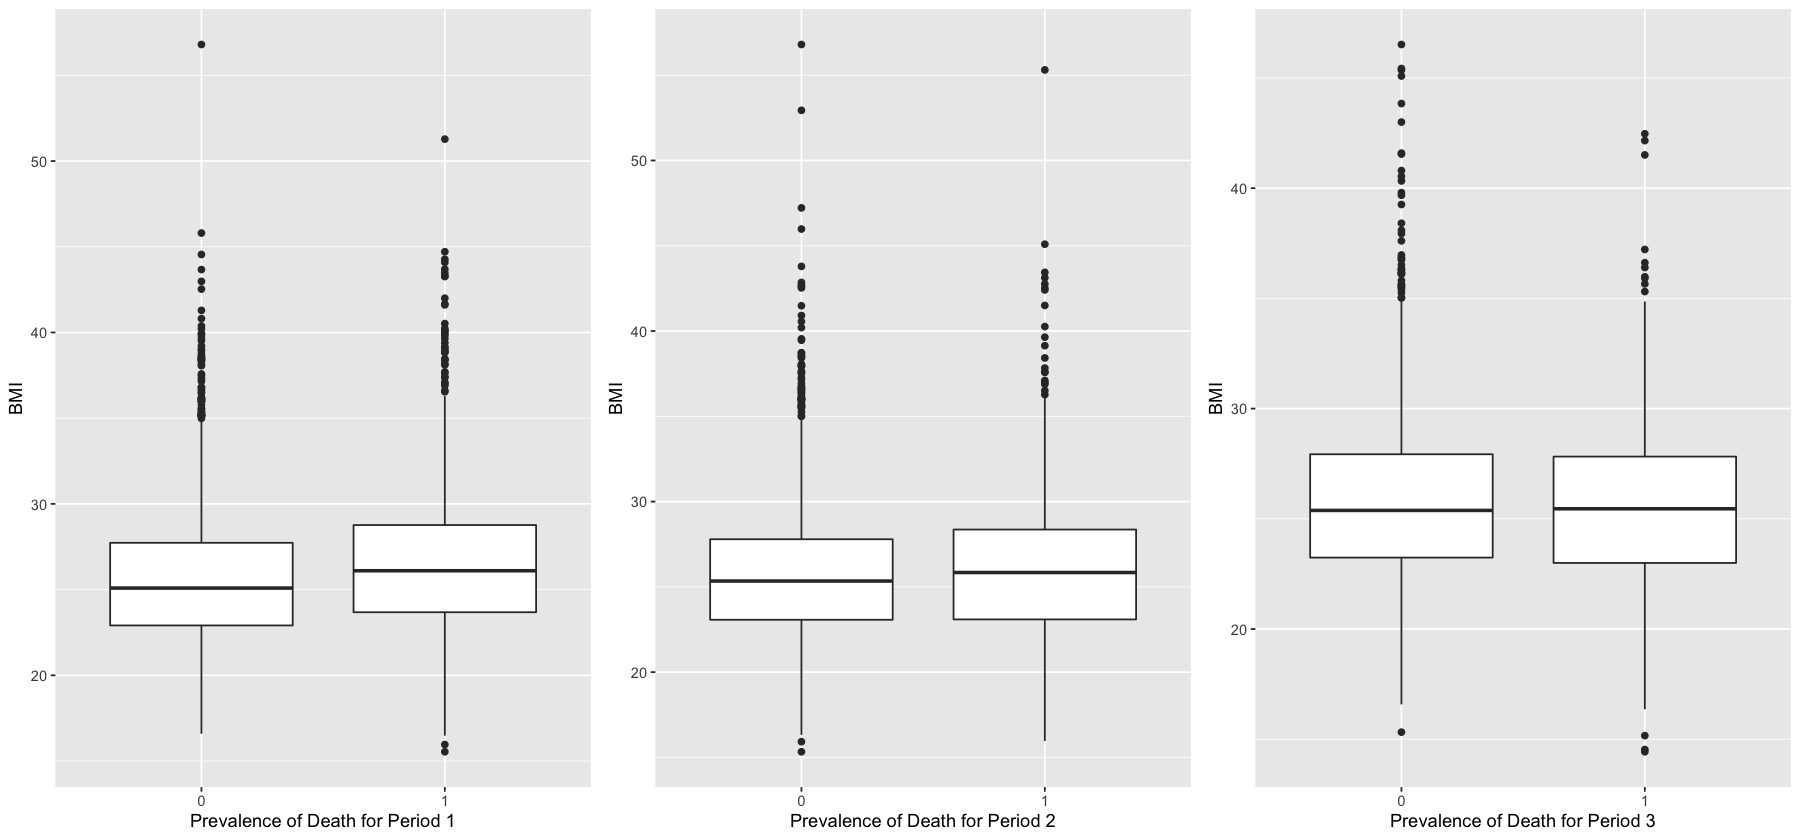

In [27]:
options(repr.plot.width=15, repr.plot.height=7)
a=ggplot(framinghamP1, aes(x = as.factor(DEATH), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Death for Period 1", y = "BMI")
b=ggplot(framinghamP2, aes(x = as.factor(DEATH), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Death for Period 2", y = "BMI")
c=ggplot(framinghamP3, aes(x = as.factor(DEATH), y = BMI)) + geom_boxplot() + labs(x = "Prevalence of Death for Period 3", y = "BMI")
grid.arrange(a, b, c, ncol = 3)

**_BMI seems to not vary significantly between the individuals who died and individuals who didn't_**

## Gender

In [28]:
cat('Proportion of Male/Female for Period 1:', round(tabulate(framinghamP1$SEX)/nrow(framinghamP1),2), '\n')
cat('Proportion of Male/Female for Period 2:', round(tabulate(framinghamP2$SEX)/nrow(framinghamP2),2), '\n')
cat('Proportion of Male/Female for Period 3:', round(tabulate(framinghamP3$SEX)/nrow(framinghamP3),2))

Proportion of Male/Female for Period 1: 0.45 0.55 
Proportion of Male/Female for Period 2: 0.44 0.56 
Proportion of Male/Female for Period 3: 0.43 0.57

### 1. Smoking Status by Gender

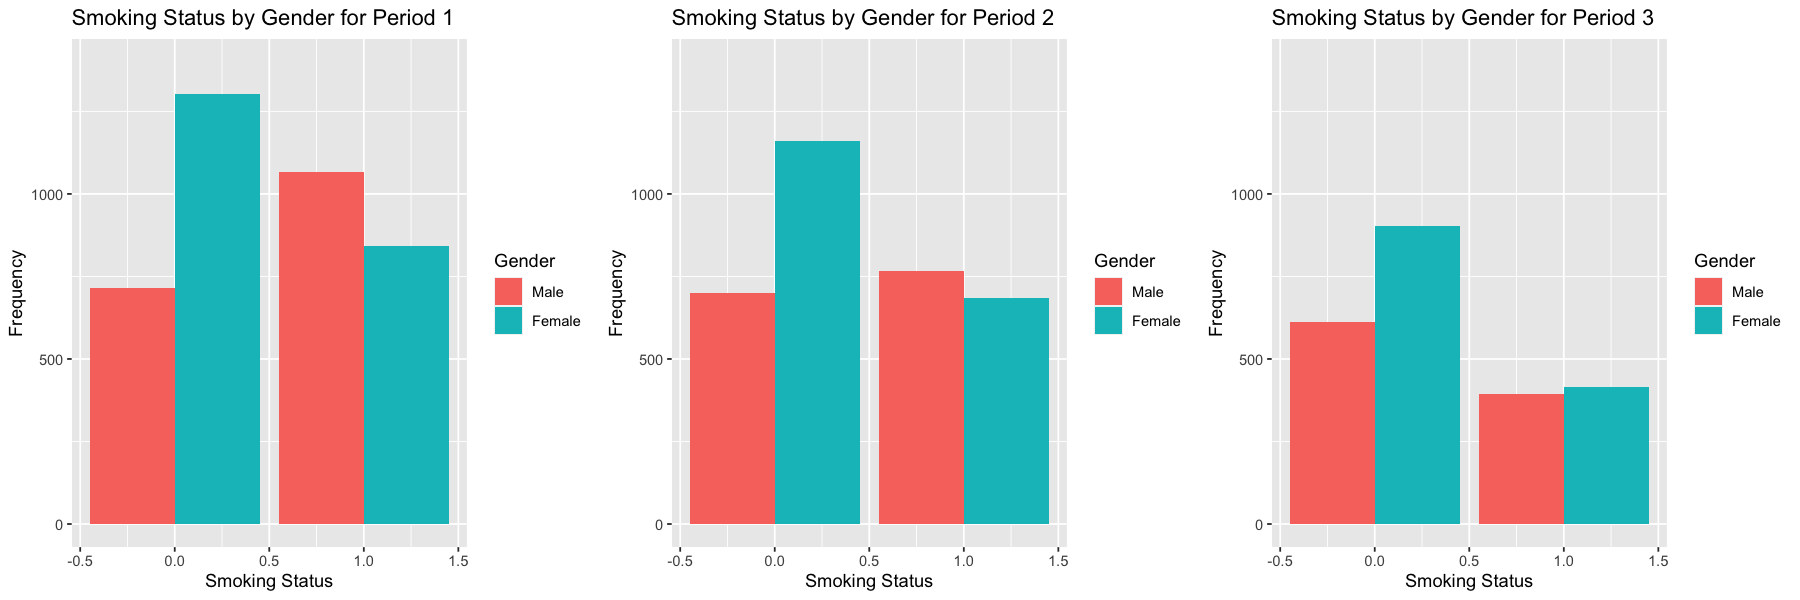

In [29]:
options(repr.plot.width=15, repr.plot.height=5)
a=ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = CURSMOKE, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Smoking Status by Gender for Period 1") +
  xlab("Smoking Status") + ylim(0,1400) +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
b=ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = CURSMOKE, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Smoking Status by Gender for Period 2") +
  xlab("Smoking Status") + ylim(0,1400) +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
c=ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = CURSMOKE, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Smoking Status by Gender for Period 3") +
  xlab("Smoking Status") + ylim(0,1400) +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
grid.arrange(a, b, c, ncol = 3)

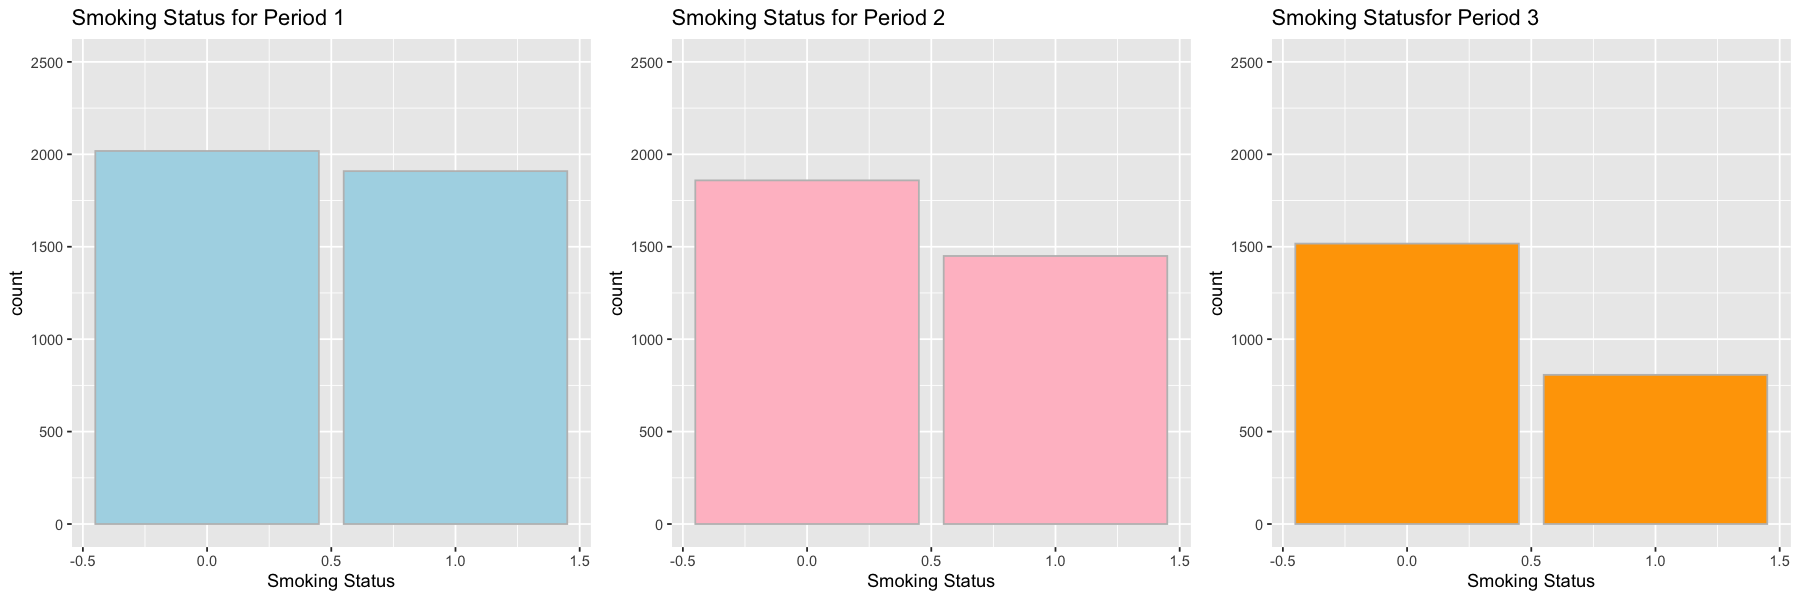

In [30]:
options(repr.plot.width=15, repr.plot.height=5)
a=ggplot(data = framinghamP1, aes(x = CURSMOKE)) + geom_bar(fill = 'lightblue', color ='grey') + 
  ggtitle("Smoking Status for Period 1") +
  xlab("Smoking Status") + ylim(0,2500) 
b=ggplot(data = framinghamP2, aes(x = CURSMOKE)) + geom_bar(fill = 'pink', color ='grey') + 
  ggtitle("Smoking Status for Period 2") +
  xlab("Smoking Status") + ylim(0,2500) 
c=ggplot(data = framinghamP3, aes(x = CURSMOKE)) + geom_bar(fill='orange', color ='grey') + 
  ggtitle("Smoking Statusfor Period 3") +
  xlab("Smoking Status") + ylim(0,2500) 
grid.arrange(a, b, c, ncol = 3)

__*The number of smokers decreased over time, as well as the number of total participants.*__

### 2. Incidence of Diabetes by Gender

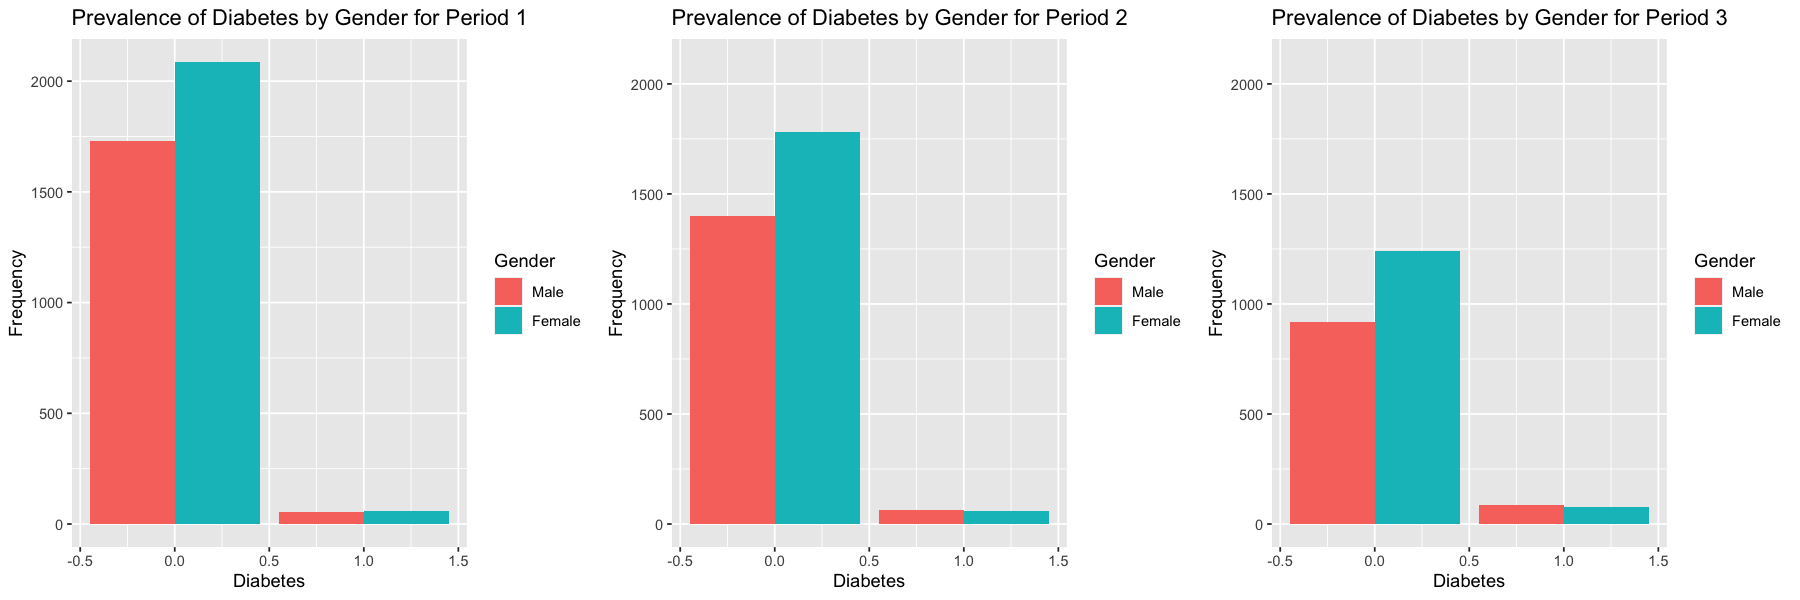

In [31]:
options(repr.plot.width=15, repr.plot.height=5)
a=ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = DIABETES, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Diabetes by Gender for Period 1") +
  xlab("Diabetes") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
b=ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = DIABETES, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Diabetes by Gender for Period 2") +
  xlab("Diabetes") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female")) + ylim(0,2100)
c=ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = DIABETES, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Diabetes by Gender for Period 3") +
  xlab("Diabetes") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female")) + ylim(0,2100)
grid.arrange(a, b, c, ncol=3)

***It seems that the incidence of diabetes increased over time***

## 3. Incidence of Heart Disease by Gender

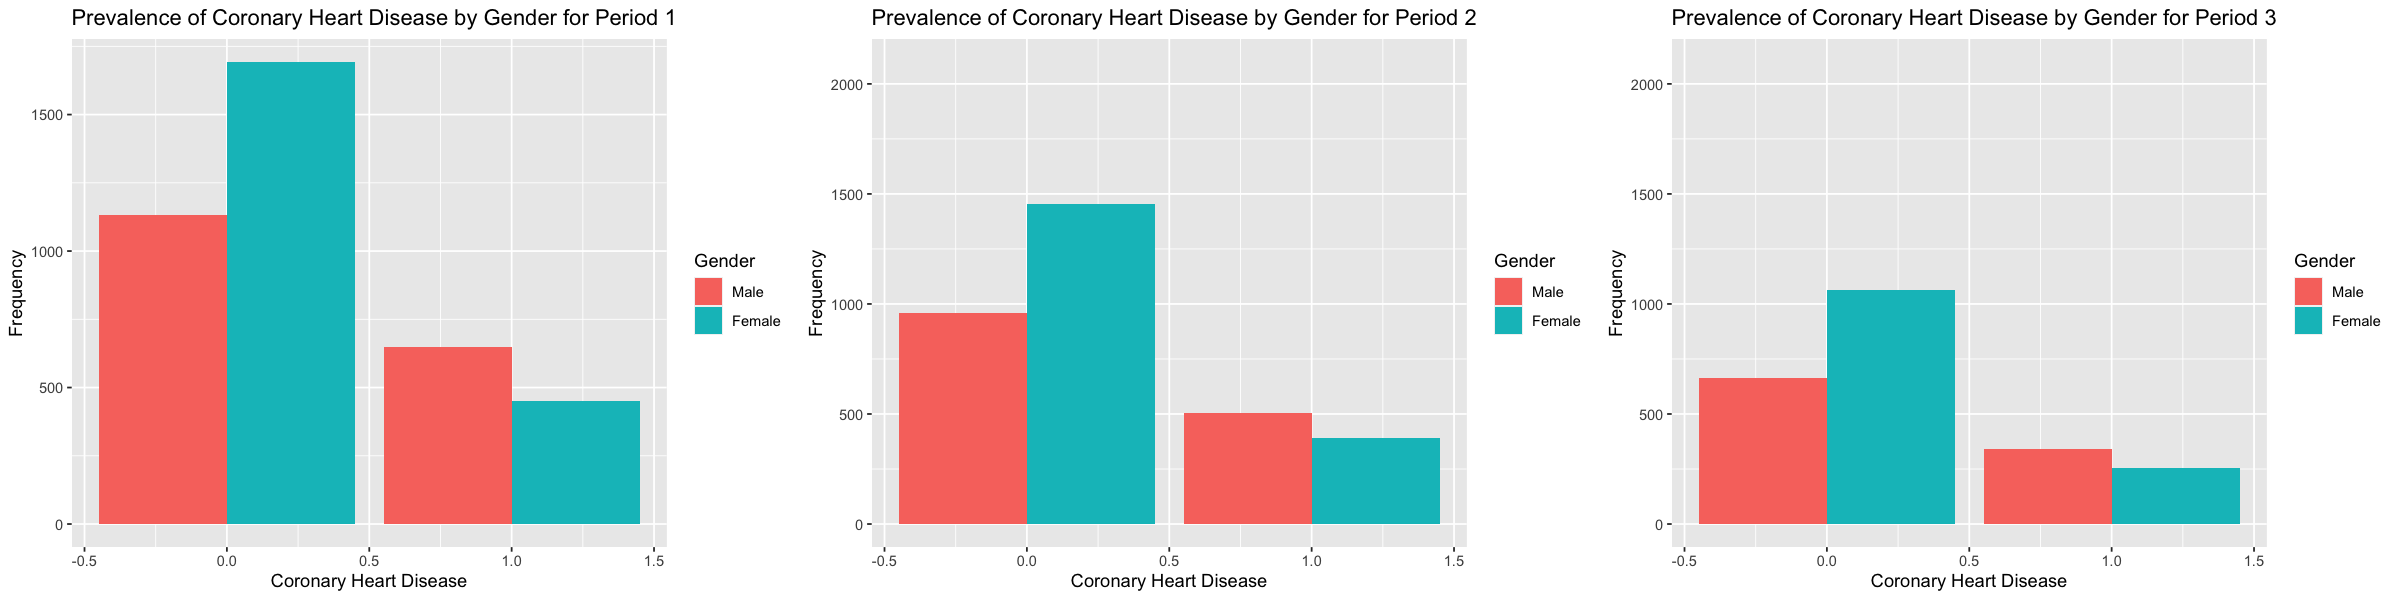

In [41]:
options(repr.plot.width=20, repr.plot.height=5)
a=ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = ANYCHD, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Coronary Heart Disease by Gender for Period 1") +
  xlab("Coronary Heart Disease") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
b=ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = ANYCHD, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Coronary Heart Disease by Gender for Period 2") +
  xlab("Coronary Heart Disease") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female")) + ylim(0,2100)
c=ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = ANYCHD, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Coronary Heart Disease by Gender for Period 3") +
  xlab("Coronary Heart Disease") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female")) + ylim(0,2100)
grid.arrange(a, b, c, ncol=3)

## 4. Incidence of Death by Gender

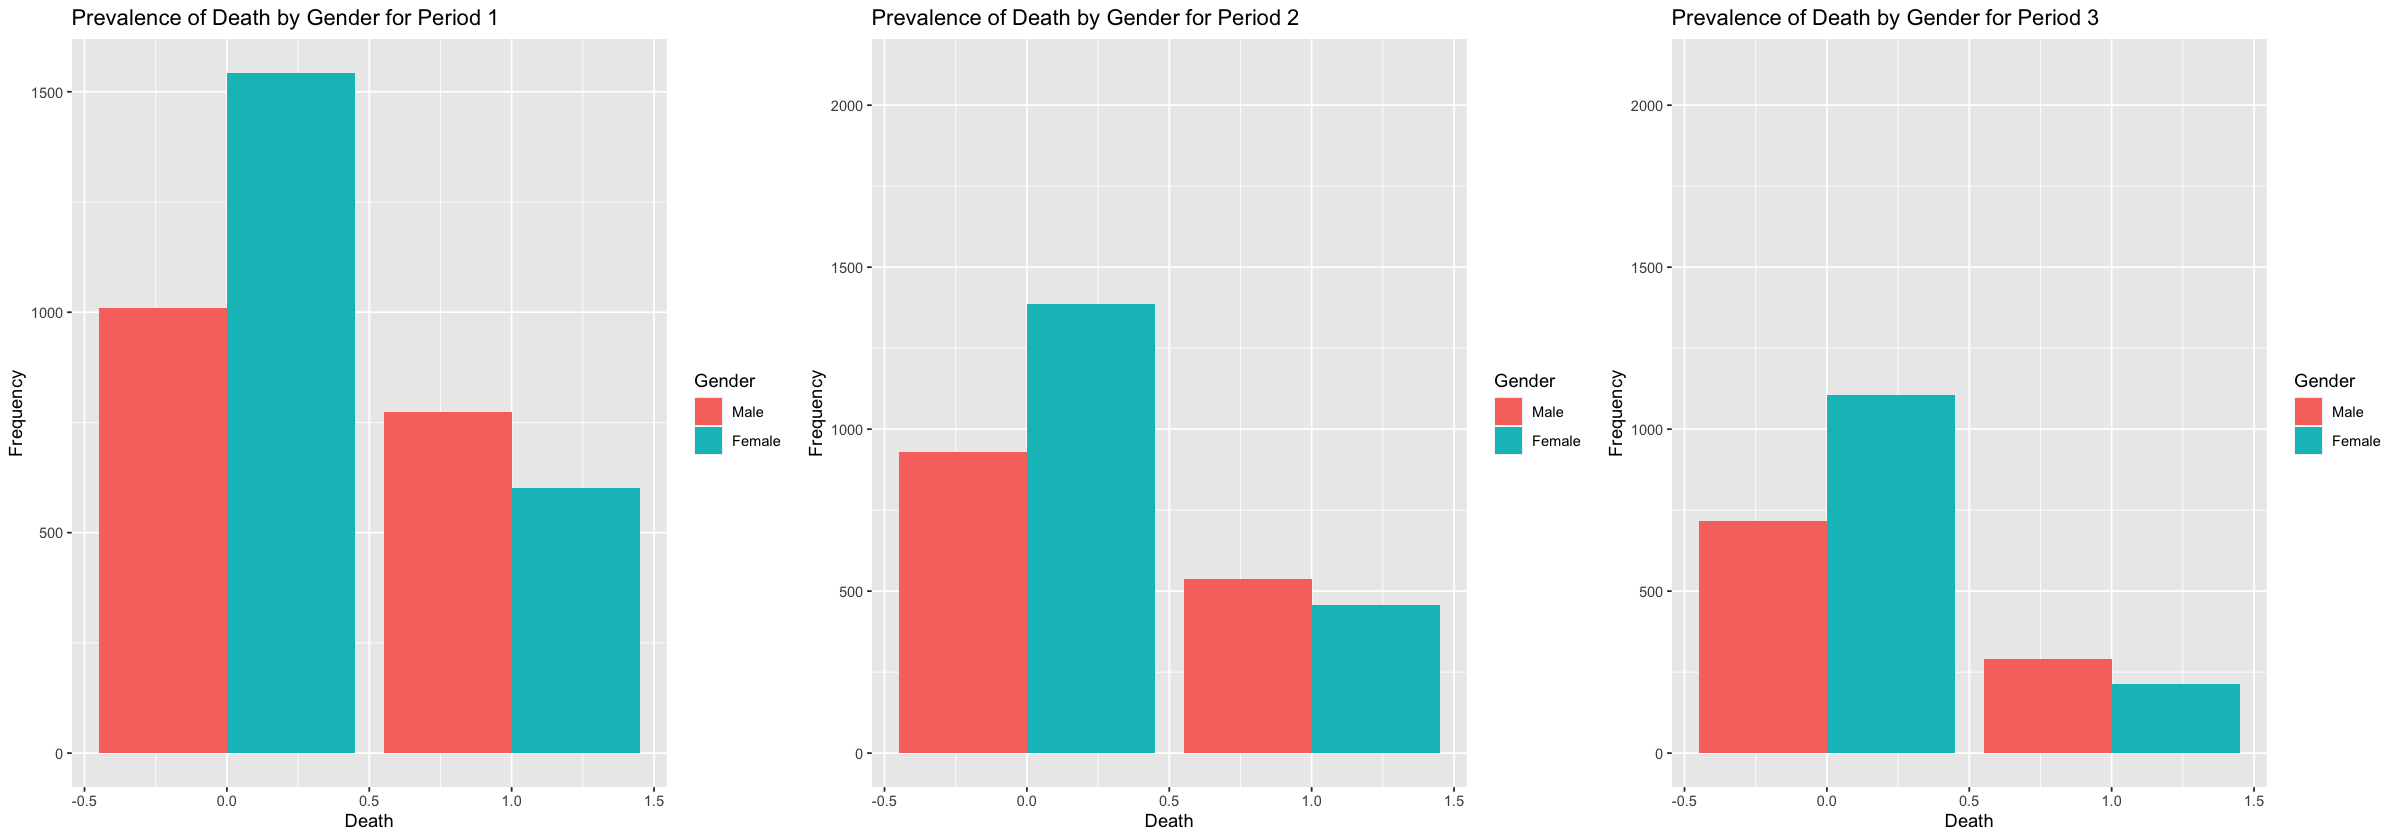

In [45]:
options(repr.plot.width=20, repr.plot.height=7)
a=ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = DEATH, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Death by Gender for Period 1") +
  xlab("Death") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female"))
b=ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = DEATH, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Death by Gender for Period 2") +
  xlab("Death") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female")) + ylim(0,2100)
c=ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = DEATH, fill = as.factor(SEX)), position = "dodge") + 
  ggtitle("Prevalence of Death by Gender for Period 3") +
  xlab("Death") +
  ylab("Frequency") + scale_fill_discrete(name = "Gender", labels = c("Male", "Female")) + ylim(0,2100)
grid.arrange(a, b, c, ncol=3)

## Glucose

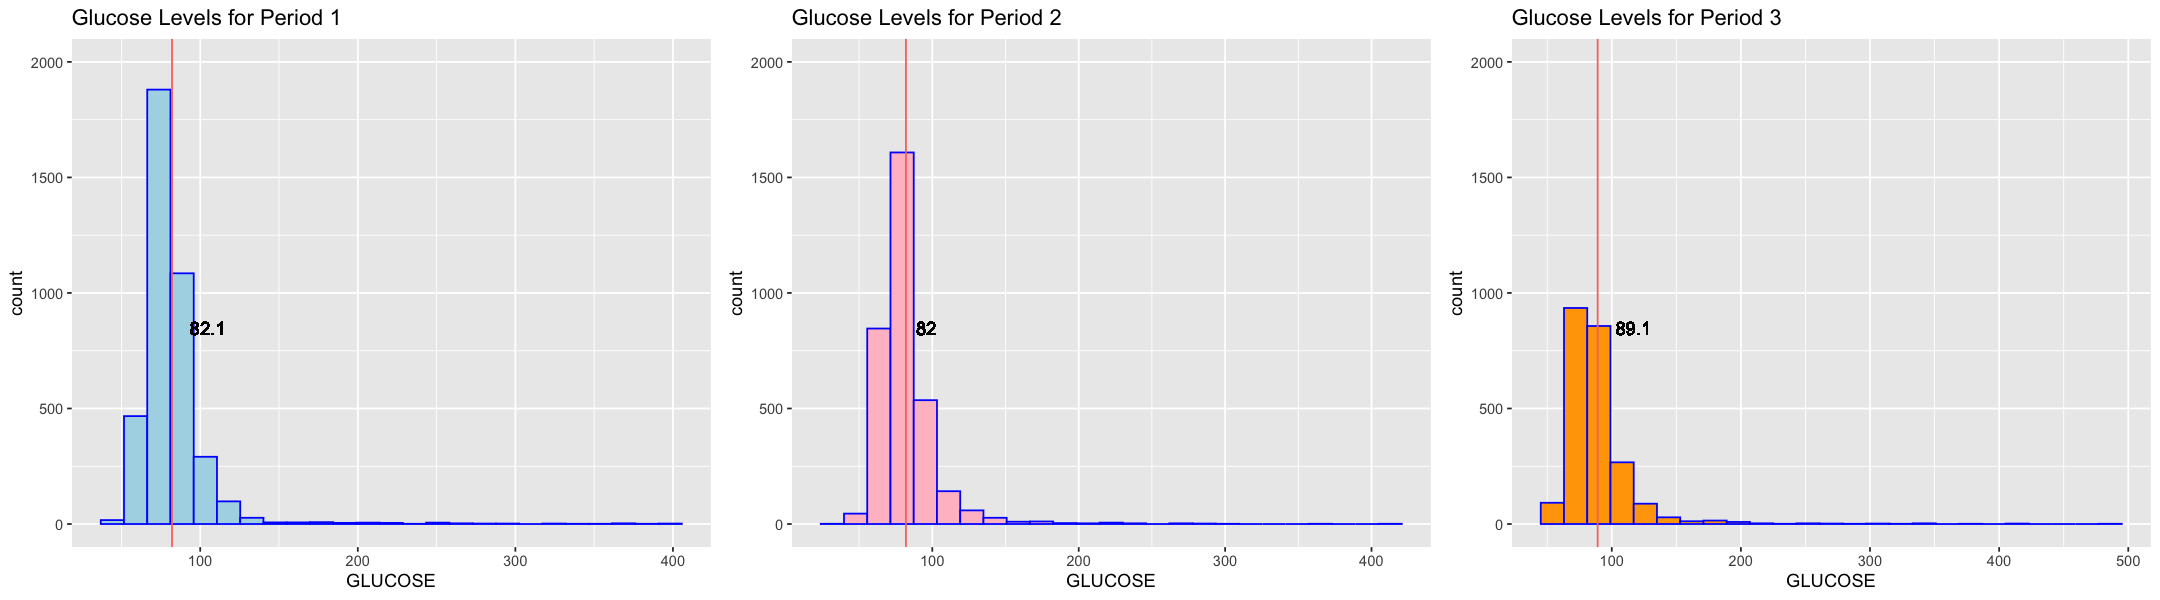

In [32]:
m1 = mean(framinghamP1$GLUCOSE, na.rm=TRUE)
m2 = mean(framinghamP2$GLUCOSE, na.rm=TRUE)
m3 = mean(framinghamP3$GLUCOSE, na.rm=TRUE)
options(repr.plot.width=18, repr.plot.height=5)
a=ggplot(data = framinghamP1, aes(x = GLUCOSE)) + ylim(0,2000) + 
    geom_histogram(bins = 25, fill='lightblue', color = "blue") + 
    geom_vline(aes(xintercept = m1, colour = "red")) + theme(legend.position = "none") + 
    geom_text(x= m1, y = 850,label = round(m1,1), hjust = -0.5) + ggtitle('Glucose Levels for Period 1')
b=ggplot(data = framinghamP2, aes(x = GLUCOSE)) + ylim(0,2000) + 
    geom_histogram(bins = 25, fill='pink', color = "blue") +
    geom_vline(aes(xintercept = m2, colour = "red")) + theme(legend.position = "none") + 
    geom_text(x= m2, y = 850,label = round(m2,1), hjust = -0.5) + ggtitle('Glucose Levels for Period 2')
c=ggplot(data = framinghamP3, aes(x = GLUCOSE)) + ylim(0,2000) + 
    geom_histogram(bins = 25, fill='orange', color = "blue") +
    geom_vline(aes(xintercept = m3, colour = "red")) + theme(legend.position = "none") + 
    geom_text(x= m3, y = 850,label = round(m3,1), hjust = -0.5) + ggtitle('Glucose Levels for Period 3')
grid.arrange(a, b, c, ncol = 3)

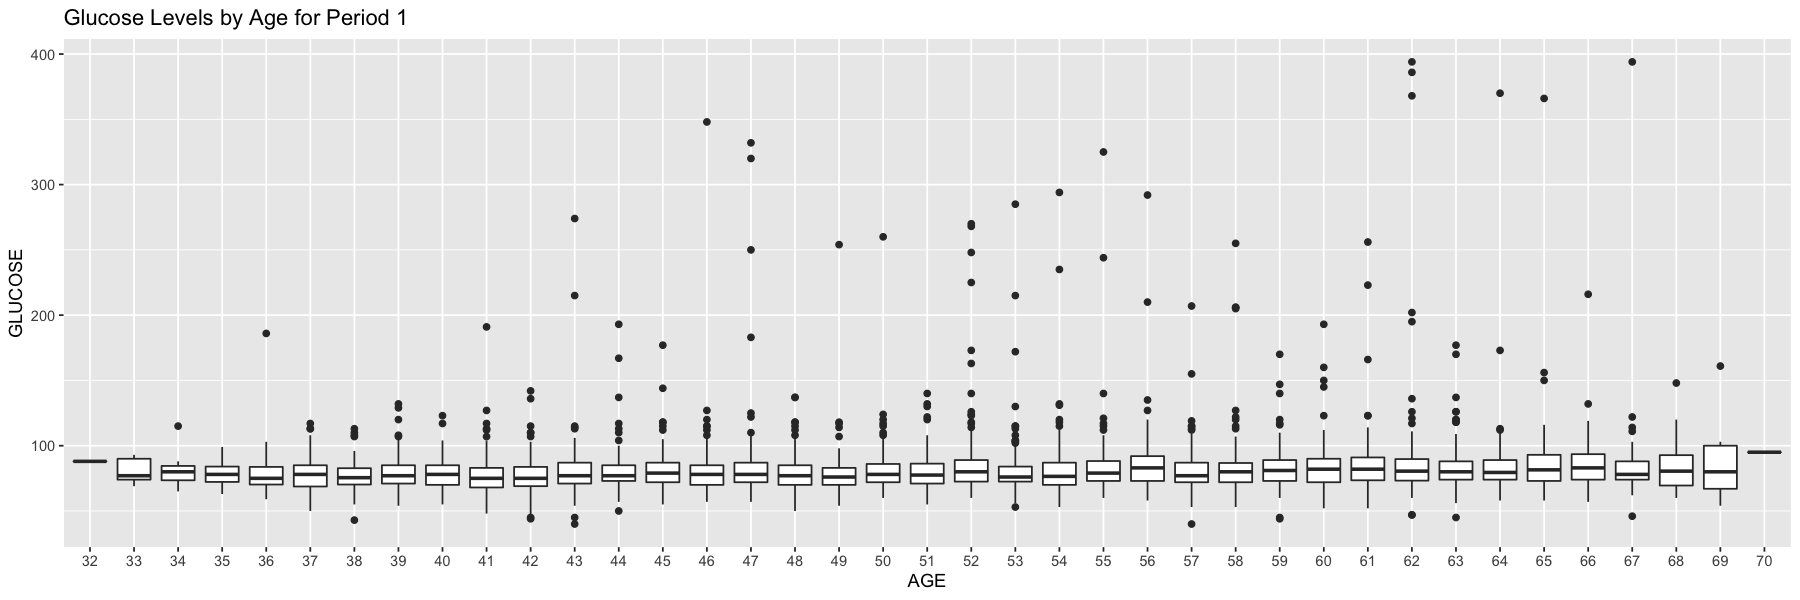

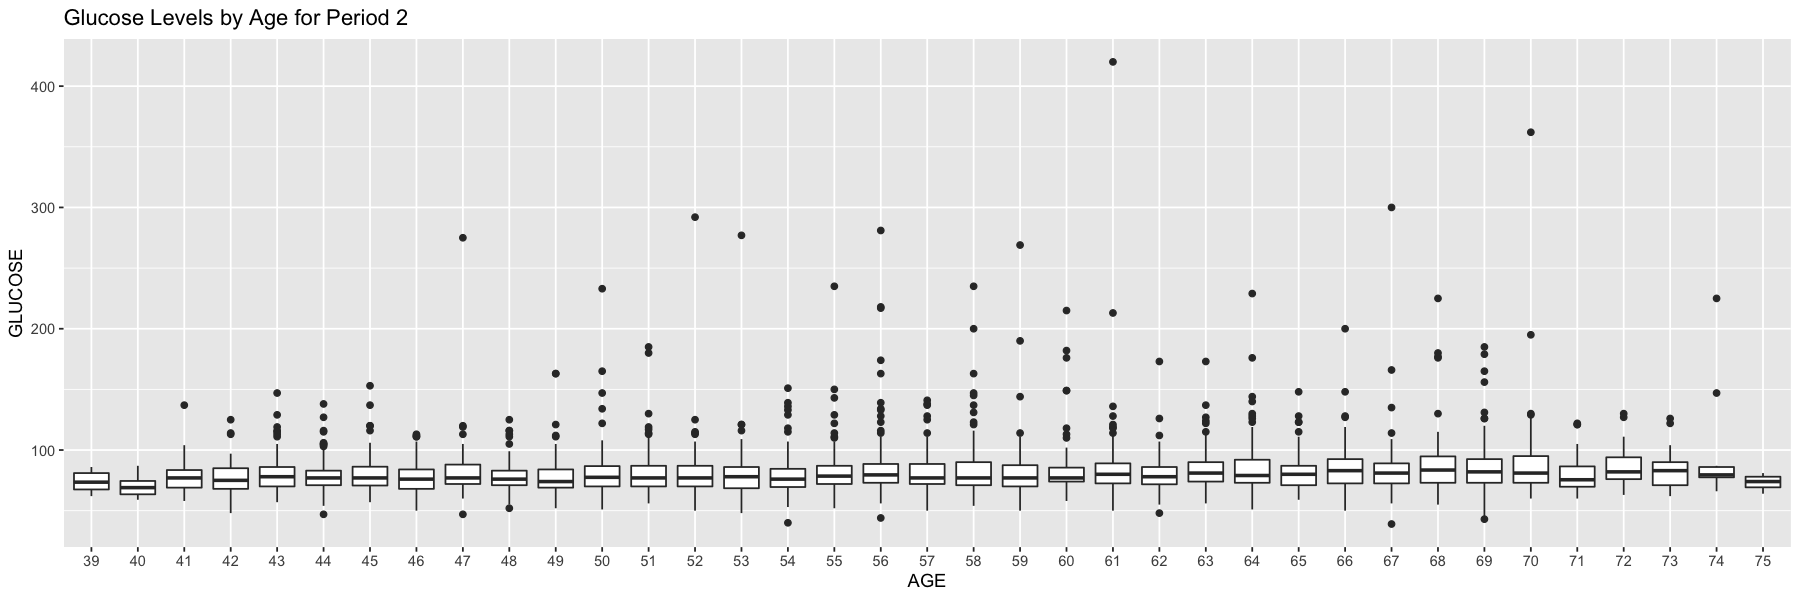

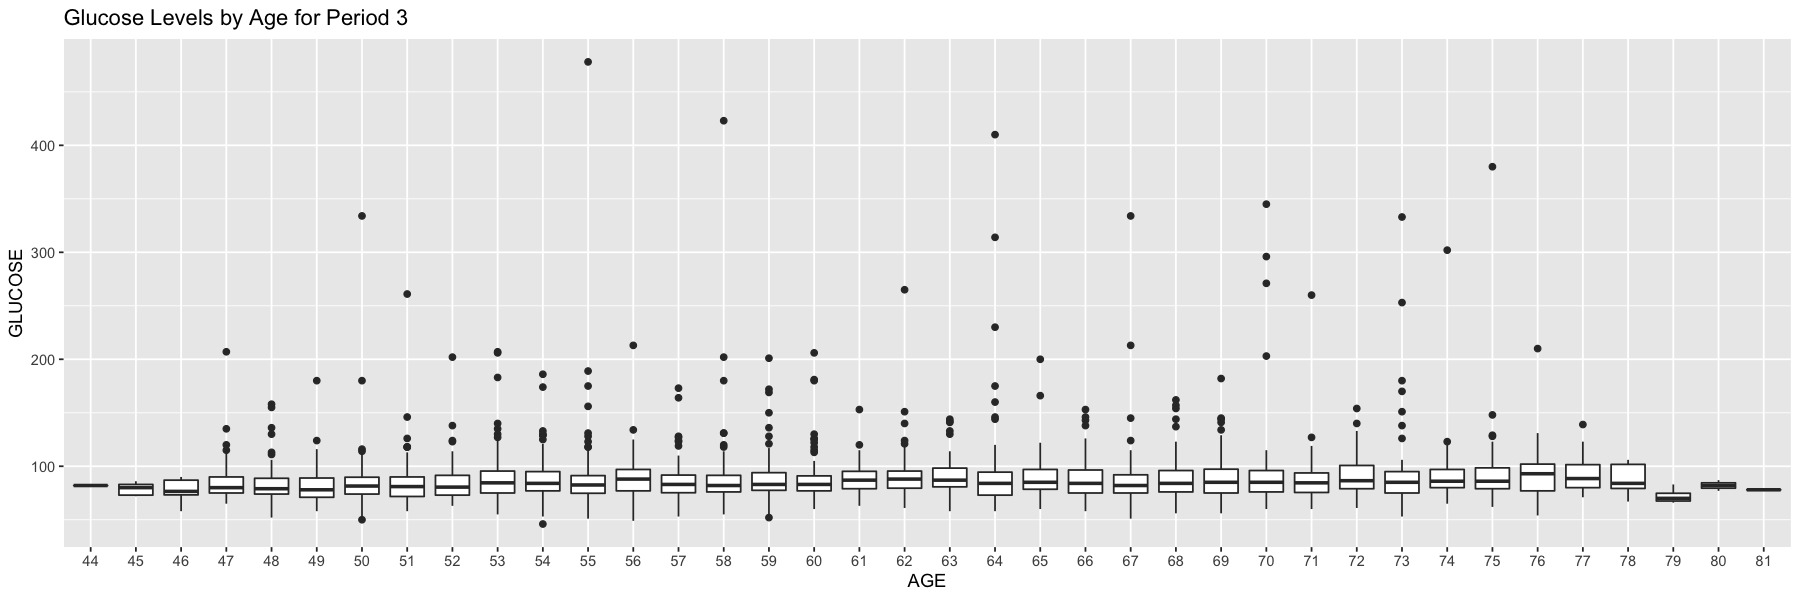

In [33]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot(framinghamP1, aes(x=as.factor(AGE), y=GLUCOSE)) + geom_boxplot() + ggtitle('Glucose Levels by Age for Period 1') + xlab('AGE')
ggplot(framinghamP2, aes(x=as.factor(AGE), y=GLUCOSE)) + geom_boxplot() + ggtitle('Glucose Levels by Age for Period 2') + xlab('AGE')
ggplot(framinghamP3, aes(x=as.factor(AGE), y=GLUCOSE)) + geom_boxplot() + ggtitle('Glucose Levels by Age for Period 3') + xlab('AGE')

___Glucose levels seem to be evenly spread across the age groups for all 3 periods___

## Diabetes

## 4. Incidence of Heart Disease in people with Diabetes 

Warning message:
“Removed 1 rows containing missing values (geom_bar).”


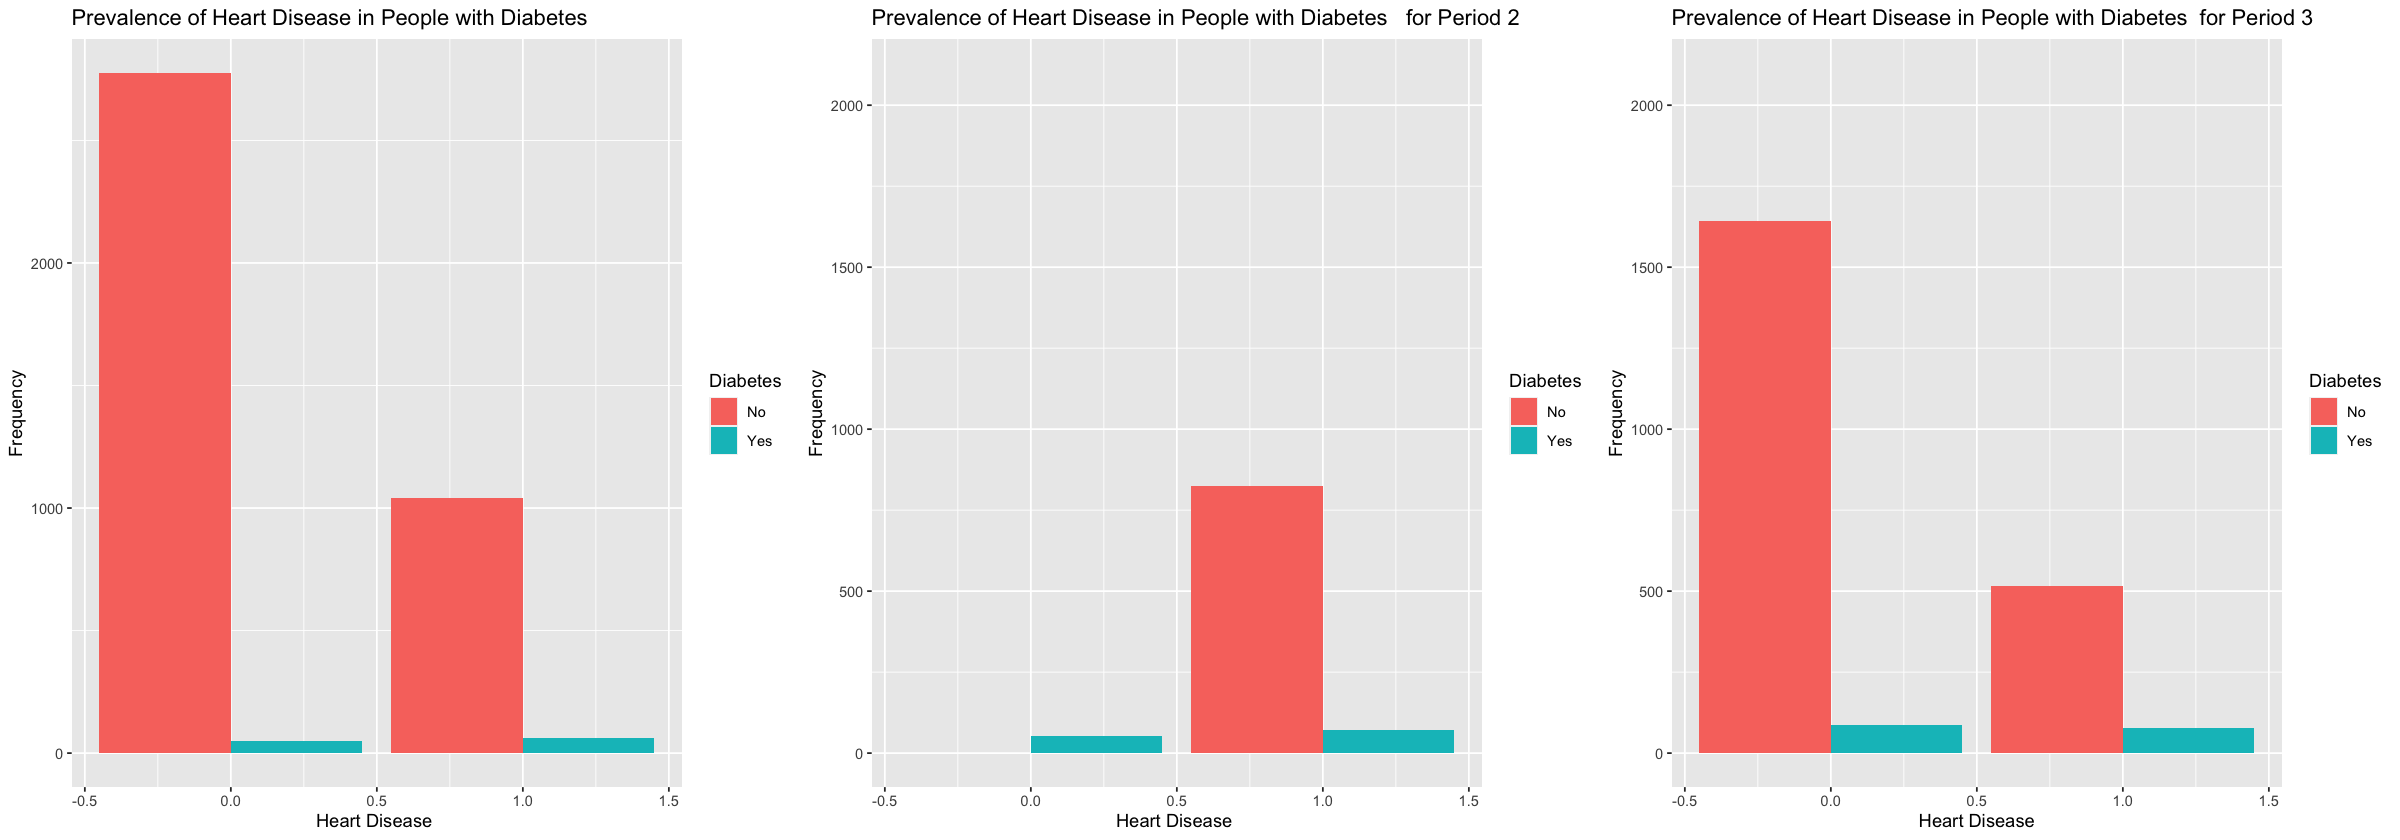

In [48]:
options(repr.plot.width=20, repr.plot.height=7)
a=ggplot(data = framinghamP1) + geom_bar(mapping = aes(x = ANYCHD, fill = as.factor(DIABETES)), position = "dodge") + 
  ggtitle("Prevalence of Heart Disease in People with Diabetes") +
  xlab("Heart Disease ") +
  ylab("Frequency") + scale_fill_discrete(name = "Diabetes", labels = c("No", "Yes"))
b=ggplot(data = framinghamP2) + geom_bar(mapping = aes(x = ANYCHD, fill = as.factor(DIABETES)), position = "dodge") + 
  ggtitle("Prevalence of Heart Disease in People with Diabetes   for Period 2") +
  xlab("Heart Disease ") +
  ylab("Frequency") + scale_fill_discrete(name = "Diabetes", labels = c("No", "Yes")) + ylim(0,2100)
c=ggplot(data = framinghamP3) + geom_bar(mapping = aes(x = ANYCHD, fill = as.factor(DIABETES)), position = "dodge") + 
  ggtitle("Prevalence of Heart Disease in People with Diabetes  for Period 3") +
  xlab("Heart Disease") +
  ylab("Frequency") + scale_fill_discrete(name = "Diabetes", labels = c("No", "Yes")) + ylim(0,2100)
grid.arrange(a, b, c, ncol=3)